In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
data_dir = '/Users/k17099kk/GCI/competition3/data/'

In [2]:
train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')

In [3]:
train[train['DBNOs'] > 1]['matchType'].value_counts()

squad-fpp    620
duo-fpp      251
squad        141
duo           67
crashfpp       7
Name: matchType, dtype: int64

# EDA

In [4]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.00,0,0,0,80,...,0,0.0000,0,0.0,0,0,257.00,4,0,0.167487
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.00,4,0,0,5,...,1,262.7000,0,0.0,0,0,1025.00,5,1607,0.610492
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.50,1,0,0,15,...,0,0.0000,0,0.0,0,0,712.80,2,1736,0.666206
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.10,0,0,0,50,...,0,0.0000,0,0.0,0,0,2738.00,4,1476,0.722956
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.00,2,0,0,36,...,0,0.0000,0,0.0,0,0,129.40,2,0,0.204095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,457088e7047d84,398bdc4584d108,70f9a656aba1ac,0,0,0.00,0,0,0,90,...,0,0.0000,0,0.0,0,0,32.12,1,0,0.058318
7130,55ba29daf4de47,45e5fa339cc561,9a8c45de16b02e,0,5,220.20,0,1,2,10,...,0,0.0000,0,0.0,0,0,1671.00,5,0,0.805244
7131,578033beb1b79f,a5645bc7a19899,ad64f6d48b9105,0,2,55.11,0,0,0,39,...,0,0.0067,0,42.0,0,0,3805.00,2,0,0.808668
7132,b24a30d67e7595,24b7abc3ff6b23,1eacfda087d5d5,0,0,23.22,0,0,0,61,...,0,0.0000,0,0.0,0,0,529.30,4,0,0.325585


In [5]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,...,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,0.239137,1.088730,128.960321,0.654191,0.213064,1.350435,47.920101,557.413092,0.906504,0.545276,...,0.165265,577.335162,0.006728,4.261145,0.025091,0.008551,1153.440717,3.573451,680.330950,0.447767
std,0.606756,1.679276,166.074326,1.098148,0.564145,2.618559,27.539021,627.905552,1.495853,0.718551,...,0.463463,1486.853919,0.110868,31.335496,0.169324,0.096539,1197.548761,2.345074,750.968072,0.289620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.125000,2.000000,0.000000,0.191378
50%,0.000000,0.000000,82.690000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,663.000000,3.000000,0.000000,0.434249
75%,0.000000,2.000000,184.625000,1.000000,0.000000,1.000000,72.000000,1187.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.000000,5.000000,1500.000000,0.702232
max,6.000000,11.000000,1755.000000,11.000000,9.000000,25.000000,100.000000,1937.000000,15.000000,8.000000,...,5.000000,14790.000000,4.000000,1123.000000,2.000000,2.000000,8628.000000,43.000000,1844.000000,1.000000


In [6]:
test.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,...,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000
mean,0.225195,1.110925,128.254480,0.603679,0.225195,1.494426,48.131550,468.157191,0.908584,0.540134,...,926.784281,0.151059,663.033152,0.002787,6.697968,0.025084,0.010033,1112.529066,3.637681,570.657191
std,0.542156,1.693616,161.473021,1.064882,0.581851,3.033596,27.675102,611.391608,1.423061,0.681036,...,728.121030,0.504339,1546.804620,0.062420,37.657805,0.173336,0.105137,1178.741273,2.323585,731.735863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161.050000,2.000000,0.000000
50%,0.000000,0.000000,85.285000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,1460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,670.000000,3.000000,0.000000
75%,0.000000,2.000000,181.800000,1.000000,0.000000,2.000000,72.000000,1129.750000,1.000000,1.000000,...,1500.000000,0.000000,305.950000,0.000000,0.000000,0.000000,0.000000,1833.500000,5.000000,1494.000000
max,4.000000,11.000000,1665.000000,12.000000,7.000000,36.000000,99.000000,1882.000000,12.000000,4.000000,...,2093.000000,12.000000,11500.000000,2.000000,679.800000,3.000000,2.000000,12280.000000,17.000000,1816.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               7134 non-null   object 
 1   groupId          7134 non-null   object 
 2   matchId          7134 non-null   object 
 3   assists          7134 non-null   int64  
 4   boosts           7134 non-null   int64  
 5   damageDealt      7134 non-null   float64
 6   DBNOs            7134 non-null   int64  
 7   headshotKills    7134 non-null   int64  
 8   heals            7134 non-null   int64  
 9   killPlace        7134 non-null   int64  
 10  killPoints       7134 non-null   int64  
 11  kills            7134 non-null   int64  
 12  killStreaks      7134 non-null   int64  
 13  longestKill      7134 non-null   float64
 14  matchDuration    7134 non-null   int64  
 15  matchType        7134 non-null   object 
 16  maxPlace         7134 non-null   int64  
 17  numGroups     

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1794 non-null   object 
 1   groupId          1794 non-null   object 
 2   matchId          1794 non-null   object 
 3   assists          1794 non-null   int64  
 4   boosts           1794 non-null   int64  
 5   damageDealt      1794 non-null   float64
 6   DBNOs            1794 non-null   int64  
 7   headshotKills    1794 non-null   int64  
 8   heals            1794 non-null   int64  
 9   killPlace        1794 non-null   int64  
 10  killPoints       1794 non-null   int64  
 11  kills            1794 non-null   int64  
 12  killStreaks      1794 non-null   int64  
 13  longestKill      1794 non-null   float64
 14  matchDuration    1794 non-null   int64  
 15  matchType        1794 non-null   object 
 16  maxPlace         1794 non-null   int64  
 17  numGroups     

plt.figure(figsize=(20,20))
sns.pairplot(train.drop(['Id', 'groupId', 'matchId'], axis=1))
plt.savefig("PUPG_pairplot.png")

plt.figure(figsize=(20,20))
sns.pairplot(test.drop(['Id', 'groupId', 'matchId'], axis=1))
plt.savefig("PUPG_pairplot_test.png")

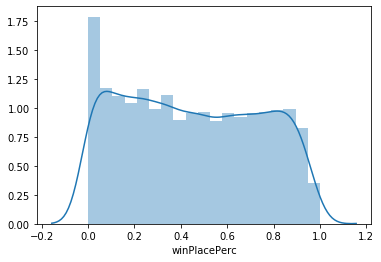

In [9]:
sns.distplot(train['winPlacePerc'])

In [10]:
train['matchType'].value_counts()

squad-fpp    2858
duo-fpp      1996
solo-fpp      774
squad         638
duo           562
solo          209
crashfpp       97
Name: matchType, dtype: int64

In [11]:
test['matchType'].value_counts()

squad-fpp           581
duo-fpp             483
solo-fpp            192
squad               190
solo                189
duo                  95
normal-squad-fpp     64
Name: matchType, dtype: int64

# Preprocessing

In [12]:
features = train.drop(['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1).columns
target = 'winPlacePerc'

In [13]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
categorical_features = ['matchType']

In [14]:
print(X_train.select_dtypes(include=['object']).columns)
print(X_test.select_dtypes(include=['object']).columns)

Index(['matchType'], dtype='object')
Index(['matchType'], dtype='object')


In [15]:
X_train['matchType'].replace('crashfpp', np.nan, inplace=True)
X_test['matchType'].replace('normal-squad-fpp', np.nan, inplace=True)

/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
#crashfppをNaNに
X_train['matchType'].value_counts()

squad-fpp    2858
duo-fpp      1996
solo-fpp      774
squad         638
duo           562
solo          209
Name: matchType, dtype: int64

In [17]:
X_test['matchType'].value_counts()

squad-fpp    581
duo-fpp      483
solo-fpp     192
squad        190
solo         189
duo           95
Name: matchType, dtype: int64

In [18]:
X_train['matchType'].replace(np.nan, 'Other', inplace=True)
X_test['matchType'].replace(np.nan, 'Other', inplace=True)

In [19]:
#NaN（train,testのみのカテゴリ）をOtherに
X_train['matchType'].value_counts()

squad-fpp    2858
duo-fpp      1996
solo-fpp      774
squad         638
duo           562
solo          209
Other          97
Name: matchType, dtype: int64

In [20]:
X_test['matchType'].value_counts()

squad-fpp    581
duo-fpp      483
solo-fpp     192
squad        190
solo         189
duo           95
Other         64
Name: matchType, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

obj_columns = ['matchType']

for c in obj_columns:
    le = LabelEncoder()
    le.fit(X_train[c])
    X_train[c] = le.transform(X_train[c])
    X_test[c] = le.transform(X_test[c])

/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
X_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,...,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,0.239137,1.088730,128.960321,0.654191,0.213064,1.350435,47.920101,557.413092,0.906504,0.545276,...,816.261144,0.165265,577.335162,0.006728,4.261145,0.025091,0.008551,1153.440717,3.573451,680.330950
std,0.606756,1.679276,166.074326,1.098148,0.564145,2.618559,27.539021,627.905552,1.495853,0.718551,...,745.436577,0.463463,1486.853919,0.110868,31.335496,0.169324,0.096539,1197.548761,2.345074,750.968072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.125000,2.000000,0.000000
50%,0.000000,0.000000,82.690000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,1411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,663.000000,3.000000,0.000000
75%,0.000000,2.000000,184.625000,1.000000,0.000000,1.000000,72.000000,1187.000000,1.000000,1.000000,...,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.000000,5.000000,1500.000000
max,6.000000,11.000000,1755.000000,11.000000,9.000000,25.000000,100.000000,1937.000000,15.000000,8.000000,...,3076.000000,5.000000,14790.000000,4.000000,1123.000000,2.000000,2.000000,8628.000000,43.000000,1844.000000


# Feature Engineering

In [23]:
#　ヘッドショットの割合
X_train['headshotKills_Rate'] = X_train['headshotKills'] / X_train['kills'] + 1
X_test['headshotKills_Rate'] = X_test['headshotKills'] / X_test['kills'] + 1
X_train['headshotKills_Rate'].fillna(0, inplace=True)
X_test['headshotKills_Rate'].fillna(0, inplace=True)

/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [24]:
# キルストリークの割合
X_train['killStreaks_Rate'] = X_train['killStreaks'] / X_train['kills'] + 1
X_test['killStreaks_Rate'] = X_test['killStreaks'] / X_test['kills'] + 1
X_train['killStreaks_Rate'].fillna(0, inplace=True)
X_test['killStreaks_Rate'].fillna(0, inplace=True)

/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


recommend_features = ['killPlace', 'walkDistance', 'matchDuration', 'damageDealt',
       'longestKill', 'rankPoints', 'winPoints', 'numGroups', 'killPoints',
       'rideDistance']

for feature1 in range(len(recommend_features)):
    for feature2 in range(len(recommend_features)):
        X_train["{0}_+_{1}".format(recommend_features[feature1], recommend_features[feature2])] = X_train[recommend_features[feature1]] + X_train[recommend_features[feature2]]
        X_train["{0}_-_{1}".format(recommend_features[feature1], recommend_features[feature2])] = X_train[recommend_features[feature1]] - X_train[recommend_features[feature2]]
        X_train["{0}_*_{1}".format(recommend_features[feature1], recommend_features[feature2])] = X_train[recommend_features[feature1]] * X_train[recommend_features[feature2]]
        X_train["{0}_/_{1}".format(recommend_features[feature1], recommend_features[feature2])] = X_train[recommend_features[feature1]] / X_train[recommend_features[feature2]]

X_train_linear = X_train.replace([np.inf, -np.inf], np.nan)
X_train_linear = X_train.fillna(0)

# feature selection(step wise)

In [ ]:
from sklearn.linear_model import Ridge

model_selctor = Ridge()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

feature_evaluations = {}

#mae_list = []
#evaluation_results = {}

#lgb_evals_result = {}
#callbacks=[lgb.record_evaluation(lgb_evals_result)]
for column in X_train.columns:
    feature_cv = []
    for tr_idx, val_idx in kf.split(X_train_selected, y_train):
        x_tr, x_val = X_train[column].iloc[tr_idx], X_train[column].iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
        model_selctor.fit(x_tr.values.reshape(-1, 1), y_tr.values.reshape(-1, 1))
        score = model_selctor.score(x_val.values.reshape(-1, 1), y_val.values.reshape(-1, 1))
        feature_cv.append(score)
        
    feature_evaluations[column] = np.mean(feature_cv)

plt.plot(pd.DataFrame(feature_evaluations.values(), index=feature_evaluations.keys(), columns=['importance']).sort_values("importance", ascending=False))

pd.DataFrame(feature_evaluations.values(), index=feature_evaluations.keys(), columns=['importance']).sort_values("importance", ascending=False)

feature_stepwise = pd.DataFrame(feature_evaluations.values(), index=feature_evaluations.keys(), columns=['importance'])

selected_feature = feature_stepwise[feature_stepwise['importance'] >= 0.1].index

import pickle
with open('boruta_select_feature.pickle', 'wb') as f:
    pickle.dump(feat_selector.support_, f)

X_train_selected = X_train[selected_feature]
#X_valid_selected = X_valid.iloc[:,feat_selector.support_]

# describe

In [25]:
true_indexs = (X_train[X_train['kills'] == X_train['DBNOs']]).index

In [26]:
X_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotKills_Rate,killStreaks_Rate
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,...,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,0.239137,1.088730,128.960321,0.654191,0.213064,1.350435,47.920101,557.413092,0.906504,0.545276,...,577.335162,0.006728,4.261145,0.025091,0.008551,1153.440717,3.573451,680.330950,0.527995,0.759480
std,0.606756,1.679276,166.074326,1.098148,0.564145,2.618559,27.539021,627.905552,1.495853,0.718551,...,1486.853919,0.110868,31.335496,0.169324,0.096539,1197.548761,2.345074,750.968072,0.649029,0.894515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,153.125000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,82.690000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,663.000000,3.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,184.625000,1.000000,0.000000,1.000000,72.000000,1187.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1974.000000,5.000000,1500.000000,1.000000,1.666667
max,6.000000,11.000000,1755.000000,11.000000,9.000000,25.000000,100.000000,1937.000000,15.000000,8.000000,...,14790.000000,4.000000,1123.000000,2.000000,2.000000,8628.000000,43.000000,1844.000000,2.000000,2.000000


In [27]:
X_train[X_train['DBNOs'] < X_train['kills']]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotKills_Rate,killStreaks_Rate
2,0,0,223.5,1,0,0,15,1673,2,1,...,0.0,0,0.000,0,0,712.8,2,1736,1.000000,1.500000
8,2,4,160.0,0,0,12,26,0,1,1,...,2580.0,0,71.500,0,0,3377.0,4,0,1.000000,2.000000
11,3,7,753.6,3,1,2,1,1244,7,2,...,567.6,0,0.000,0,0,2955.0,6,1549,1.142857,1.285714
16,2,0,211.4,0,0,1,36,1317,1,1,...,0.0,0,0.000,0,0,662.7,3,1542,1.000000,2.000000
19,0,0,148.5,0,0,0,35,1022,1,1,...,0.0,0,0.000,0,0,208.1,2,1493,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,0,1,166.3,1,0,1,14,0,2,2,...,1238.0,0,0.000,0,1,1521.0,2,0,1.000000,2.000000
7111,0,1,361.9,0,1,2,14,0,3,1,...,0.0,0,0.000,0,0,184.4,3,0,1.333333,1.333333
7113,0,1,127.4,0,0,1,34,0,1,1,...,0.0,0,0.000,0,0,363.9,4,0,1.000000,2.000000
7126,0,1,203.9,1,0,7,15,1265,2,1,...,0.0,0,6.085,0,0,3228.0,3,1498,1.000000,1.500000


# fillna

In [28]:
# preprocessing for tree model
X_train_tree = X_train.replace([np.inf, -np.inf], np.nan)
X_train_tree = X_train_tree.fillna(-99999)

X_train_linear = X_train.replace([np.inf, -np.inf], np.nan)
X_train_linear = X_train_linear.fillna(X_train_linear.mean())

In [29]:
X_train_linear

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotKills_Rate,killStreaks_Rate
0,0,0,0.00,0,0,0,80,0,0,0,...,0.0000,0,0.0,0,0,257.00,4,0,0.000000,0.000000
1,0,2,359.00,4,0,0,5,1387,4,2,...,262.7000,0,0.0,0,0,1025.00,5,1607,1.000000,1.500000
2,0,0,223.50,1,0,0,15,1673,2,1,...,0.0000,0,0.0,0,0,712.80,2,1736,1.000000,1.500000
3,0,0,128.10,0,0,0,50,1479,0,0,...,0.0000,0,0.0,0,0,2738.00,4,1476,0.000000,0.000000
4,0,0,200.00,2,0,0,36,0,1,1,...,0.0000,0,0.0,0,0,129.40,2,0,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,0,0,0.00,0,0,0,90,0,0,0,...,0.0000,0,0.0,0,0,32.12,1,0,0.000000,0.000000
7130,0,5,220.20,0,1,2,10,0,3,1,...,0.0000,0,0.0,0,0,1671.00,5,0,1.333333,1.333333
7131,0,2,55.11,0,0,0,39,0,0,0,...,0.0067,0,42.0,0,0,3805.00,2,0,0.000000,0.000000
7132,0,0,23.22,0,0,0,61,0,0,0,...,0.0000,0,0.0,0,0,529.30,4,0,0.000000,0.000000


In [30]:
import pickle
with open('lgbm_importance_for_linear.pickle', 'rb') as f:
    selected_feature = pickle.load(f)

# Modeling

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

## LGBM model

In [32]:
import lightgbm as lgb

/Users/k17099kk/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [33]:
#?lgb.train

In [34]:
params = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'mae',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'regression', 
    'verbosity': 1,
    'seed': 42
}


In [62]:
#param
params = {
    'objective': 'regression',
    'metric': 'mae',
    "verbosity": 1,
    "random_state":42
}

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list = []
evaluation_results = {}

lgb_evals_result = {}
callbacks=[lgb.record_evaluation(lgb_evals_result)]

for tr_idx, val_idx in kf.split(X_train_tree, y_train):
    x_tr, x_val = X_train_tree.iloc[tr_idx], X_train_tree.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
    lgb_train = lgb.Dataset(x_tr, y_tr)
    lgb_valid = lgb.Dataset(x_val, y_val)
    
    model_lgb = lgb.train(params=params,
                          train_set=lgb_train,
                          valid_sets=lgb_valid,
                          evals_result=evaluation_results,
                          num_boost_round=10000,
                          early_stopping_rounds=50,
                          )
    
    predict_proba = model_lgb.predict(x_val, num_iteration=model_lgb.best_iteration)
    mae_list.append(mean_absolute_error(predict_proba, y_val))

print('CV_MAE:{}'.format(np.mean(mae_list)))
x_val_tree = x_val

[1]	valid_0's l1: 0.467055
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.462983
[3]	valid_0's l1: 0.458696
[4]	valid_0's l1: 0.454728
[5]	valid_0's l1: 0.450853
[6]	valid_0's l1: 0.446897
[7]	valid_0's l1: 0.443052
[8]	valid_0's l1: 0.439228
[9]	valid_0's l1: 0.435105
[10]	valid_0's l1: 0.43091
[11]	valid_0's l1: 0.426921
[12]	valid_0's l1: 0.42342
[13]	valid_0's l1: 0.419543
[14]	valid_0's l1: 0.416204
[15]	valid_0's l1: 0.412636
[16]	valid_0's l1: 0.408725
[17]	valid_0's l1: 0.405439
[18]	valid_0's l1: 0.402013
[19]	valid_0's l1: 0.398862
[20]	valid_0's l1: 0.395282
[21]	valid_0's l1: 0.39235
[22]	valid_0's l1: 0.389469
[23]	valid_0's l1: 0.386678
[24]	valid_0's l1: 0.383843
[25]	valid_0's l1: 0.38107
[26]	valid_0's l1: 0.3784
[27]	valid_0's l1: 0.37573
[28]	valid_0's l1: 0.372288
[29]	valid_0's l1: 0.369662
[30]	valid_0's l1: 0.367261
[31]	valid_0's l1: 0.363832
[32]	valid_0's l1: 0.361361
[33]	valid_0's l1: 0.358766
[34]	valid_0's l1: 0.356003
[35

[301]	valid_0's l1: 0.140921
[302]	valid_0's l1: 0.140348
[303]	valid_0's l1: 0.140249
[304]	valid_0's l1: 0.14014
[305]	valid_0's l1: 0.139848
[306]	valid_0's l1: 0.139759
[307]	valid_0's l1: 0.139726
[308]	valid_0's l1: 0.139413
[309]	valid_0's l1: 0.138837
[310]	valid_0's l1: 0.138706
[311]	valid_0's l1: 0.138105
[312]	valid_0's l1: 0.138013
[313]	valid_0's l1: 0.137962
[314]	valid_0's l1: 0.137756
[315]	valid_0's l1: 0.137441
[316]	valid_0's l1: 0.137415
[317]	valid_0's l1: 0.137216
[318]	valid_0's l1: 0.136587
[319]	valid_0's l1: 0.136496
[320]	valid_0's l1: 0.136455
[321]	valid_0's l1: 0.136412
[322]	valid_0's l1: 0.13583
[323]	valid_0's l1: 0.135326
[324]	valid_0's l1: 0.135278
[325]	valid_0's l1: 0.134988
[326]	valid_0's l1: 0.134892
[327]	valid_0's l1: 0.134817
[328]	valid_0's l1: 0.13479
[329]	valid_0's l1: 0.134473
[330]	valid_0's l1: 0.134264
[331]	valid_0's l1: 0.133998
[332]	valid_0's l1: 0.133883
[333]	valid_0's l1: 0.133309
[334]	valid_0's l1: 0.133267
[335]	valid_0's l

[650]	valid_0's l1: 0.100873
[651]	valid_0's l1: 0.100618
[652]	valid_0's l1: 0.100577
[653]	valid_0's l1: 0.100564
[654]	valid_0's l1: 0.100544
[655]	valid_0's l1: 0.100547
[656]	valid_0's l1: 0.100547
[657]	valid_0's l1: 0.100361
[658]	valid_0's l1: 0.10036
[659]	valid_0's l1: 0.10036
[660]	valid_0's l1: 0.100361
[661]	valid_0's l1: 0.100311
[662]	valid_0's l1: 0.100293
[663]	valid_0's l1: 0.100274
[664]	valid_0's l1: 0.100122
[665]	valid_0's l1: 0.100112
[666]	valid_0's l1: 0.0999375
[667]	valid_0's l1: 0.0999453
[668]	valid_0's l1: 0.0999344
[669]	valid_0's l1: 0.0999229
[670]	valid_0's l1: 0.0999102
[671]	valid_0's l1: 0.0997357
[672]	valid_0's l1: 0.0995741
[673]	valid_0's l1: 0.0995721
[674]	valid_0's l1: 0.0995634
[675]	valid_0's l1: 0.0995211
[676]	valid_0's l1: 0.0993598
[677]	valid_0's l1: 0.0993643
[678]	valid_0's l1: 0.0993615
[679]	valid_0's l1: 0.09937
[680]	valid_0's l1: 0.0993741
[681]	valid_0's l1: 0.099328
[682]	valid_0's l1: 0.0991287
[683]	valid_0's l1: 0.0989775
[

[944]	valid_0's l1: 0.0928302
[945]	valid_0's l1: 0.0928256
[946]	valid_0's l1: 0.092821
[947]	valid_0's l1: 0.0928218
[948]	valid_0's l1: 0.0928218
[949]	valid_0's l1: 0.0928235
[950]	valid_0's l1: 0.0928176
[951]	valid_0's l1: 0.0927324
[952]	valid_0's l1: 0.0927346
[953]	valid_0's l1: 0.0927281
[954]	valid_0's l1: 0.0927293
[955]	valid_0's l1: 0.092732
[956]	valid_0's l1: 0.0927341
[957]	valid_0's l1: 0.0927327
[958]	valid_0's l1: 0.0926135
[959]	valid_0's l1: 0.0926066
[960]	valid_0's l1: 0.0925258
[961]	valid_0's l1: 0.0925211
[962]	valid_0's l1: 0.0923652
[963]	valid_0's l1: 0.0923643
[964]	valid_0's l1: 0.0921969
[965]	valid_0's l1: 0.0921796
[966]	valid_0's l1: 0.0921627
[967]	valid_0's l1: 0.0921576
[968]	valid_0's l1: 0.0919988
[969]	valid_0's l1: 0.0919947
[970]	valid_0's l1: 0.0919993
[971]	valid_0's l1: 0.0920015
[972]	valid_0's l1: 0.09184
[973]	valid_0's l1: 0.09183
[974]	valid_0's l1: 0.0918279
[975]	valid_0's l1: 0.0918258
[976]	valid_0's l1: 0.0918294
[977]	valid_0's 

[1229]	valid_0's l1: 0.0872059
[1230]	valid_0's l1: 0.0872062
[1231]	valid_0's l1: 0.0872087
[1232]	valid_0's l1: 0.0871374
[1233]	valid_0's l1: 0.0871276
[1234]	valid_0's l1: 0.0870822
[1235]	valid_0's l1: 0.0870827
[1236]	valid_0's l1: 0.0870431
[1237]	valid_0's l1: 0.0870385
[1238]	valid_0's l1: 0.0870305
[1239]	valid_0's l1: 0.087024
[1240]	valid_0's l1: 0.0870231
[1241]	valid_0's l1: 0.0870226
[1242]	valid_0's l1: 0.0870165
[1243]	valid_0's l1: 0.0870152
[1244]	valid_0's l1: 0.0870181
[1245]	valid_0's l1: 0.087008
[1246]	valid_0's l1: 0.0870075
[1247]	valid_0's l1: 0.0869704
[1248]	valid_0's l1: 0.0869717
[1249]	valid_0's l1: 0.0869683
[1250]	valid_0's l1: 0.0869579
[1251]	valid_0's l1: 0.0869587
[1252]	valid_0's l1: 0.0869353
[1253]	valid_0's l1: 0.086935
[1254]	valid_0's l1: 0.0869343
[1255]	valid_0's l1: 0.0869197
[1256]	valid_0's l1: 0.0869158
[1257]	valid_0's l1: 0.0868326
[1258]	valid_0's l1: 0.0868384
[1259]	valid_0's l1: 0.0868438
[1260]	valid_0's l1: 0.0868475
[1261]	vali

[1506]	valid_0's l1: 0.0850786
[1507]	valid_0's l1: 0.0850761
[1508]	valid_0's l1: 0.0850762
[1509]	valid_0's l1: 0.0850792
[1510]	valid_0's l1: 0.085078
[1511]	valid_0's l1: 0.085082
[1512]	valid_0's l1: 0.0850839
[1513]	valid_0's l1: 0.0850921
[1514]	valid_0's l1: 0.0850881
[1515]	valid_0's l1: 0.0850894
[1516]	valid_0's l1: 0.0850904
[1517]	valid_0's l1: 0.0850932
[1518]	valid_0's l1: 0.0850999
[1519]	valid_0's l1: 0.0850687
[1520]	valid_0's l1: 0.0850692
[1521]	valid_0's l1: 0.0850599
[1522]	valid_0's l1: 0.0849669
[1523]	valid_0's l1: 0.084964
[1524]	valid_0's l1: 0.0849707
[1525]	valid_0's l1: 0.0849735
[1526]	valid_0's l1: 0.0849476
[1527]	valid_0's l1: 0.0849477
[1528]	valid_0's l1: 0.084951
[1529]	valid_0's l1: 0.0848715
[1530]	valid_0's l1: 0.0848464
[1531]	valid_0's l1: 0.0848482
[1532]	valid_0's l1: 0.0848525
[1533]	valid_0's l1: 0.0848551
[1534]	valid_0's l1: 0.0848525
[1535]	valid_0's l1: 0.0848548
[1536]	valid_0's l1: 0.0848523
[1537]	valid_0's l1: 0.0848513
[1538]	valid

[1796]	valid_0's l1: 0.0833308
[1797]	valid_0's l1: 0.08333
[1798]	valid_0's l1: 0.08333
[1799]	valid_0's l1: 0.0833284
[1800]	valid_0's l1: 0.0833299
[1801]	valid_0's l1: 0.0833233
[1802]	valid_0's l1: 0.0833183
[1803]	valid_0's l1: 0.0833104
[1804]	valid_0's l1: 0.0832391
[1805]	valid_0's l1: 0.0832362
[1806]	valid_0's l1: 0.0832388
[1807]	valid_0's l1: 0.0832312
[1808]	valid_0's l1: 0.0832029
[1809]	valid_0's l1: 0.0832045
[1810]	valid_0's l1: 0.0832032
[1811]	valid_0's l1: 0.0831723
[1812]	valid_0's l1: 0.0831748
[1813]	valid_0's l1: 0.083173
[1814]	valid_0's l1: 0.0831763
[1815]	valid_0's l1: 0.0831622
[1816]	valid_0's l1: 0.0831011
[1817]	valid_0's l1: 0.0831014
[1818]	valid_0's l1: 0.0830413
[1819]	valid_0's l1: 0.0830452
[1820]	valid_0's l1: 0.0830523
[1821]	valid_0's l1: 0.0830256
[1822]	valid_0's l1: 0.083022
[1823]	valid_0's l1: 0.0829982
[1824]	valid_0's l1: 0.082992
[1825]	valid_0's l1: 0.0829927
[1826]	valid_0's l1: 0.0829935
[1827]	valid_0's l1: 0.082992
[1828]	valid_0's

[2086]	valid_0's l1: 0.0815105
[2087]	valid_0's l1: 0.0815055
[2088]	valid_0's l1: 0.0814861
[2089]	valid_0's l1: 0.0814661
[2090]	valid_0's l1: 0.0814658
[2091]	valid_0's l1: 0.0814641
[2092]	valid_0's l1: 0.0814622
[2093]	valid_0's l1: 0.0814586
[2094]	valid_0's l1: 0.0814556
[2095]	valid_0's l1: 0.0814587
[2096]	valid_0's l1: 0.0814554
[2097]	valid_0's l1: 0.0814471
[2098]	valid_0's l1: 0.0814464
[2099]	valid_0's l1: 0.0814478
[2100]	valid_0's l1: 0.0814447
[2101]	valid_0's l1: 0.0814422
[2102]	valid_0's l1: 0.0814486
[2103]	valid_0's l1: 0.0814419
[2104]	valid_0's l1: 0.0814479
[2105]	valid_0's l1: 0.0814446
[2106]	valid_0's l1: 0.0814475
[2107]	valid_0's l1: 0.0814485
[2108]	valid_0's l1: 0.081449
[2109]	valid_0's l1: 0.0814276
[2110]	valid_0's l1: 0.0813713
[2111]	valid_0's l1: 0.0813262
[2112]	valid_0's l1: 0.0812686
[2113]	valid_0's l1: 0.0812687
[2114]	valid_0's l1: 0.0812686
[2115]	valid_0's l1: 0.0812726
[2116]	valid_0's l1: 0.0812755
[2117]	valid_0's l1: 0.0812207
[2118]	va

[2391]	valid_0's l1: 0.0798845
[2392]	valid_0's l1: 0.0798825
[2393]	valid_0's l1: 0.0798657
[2394]	valid_0's l1: 0.0798248
[2395]	valid_0's l1: 0.0798264
[2396]	valid_0's l1: 0.0798256
[2397]	valid_0's l1: 0.0798237
[2398]	valid_0's l1: 0.0798203
[2399]	valid_0's l1: 0.07982
[2400]	valid_0's l1: 0.0798189
[2401]	valid_0's l1: 0.0798158
[2402]	valid_0's l1: 0.0797987
[2403]	valid_0's l1: 0.0797812
[2404]	valid_0's l1: 0.079776
[2405]	valid_0's l1: 0.0797748
[2406]	valid_0's l1: 0.0797763
[2407]	valid_0's l1: 0.0797715
[2408]	valid_0's l1: 0.0797746
[2409]	valid_0's l1: 0.0797778
[2410]	valid_0's l1: 0.0797754
[2411]	valid_0's l1: 0.0797675
[2412]	valid_0's l1: 0.0797665
[2413]	valid_0's l1: 0.0797635
[2414]	valid_0's l1: 0.0797615
[2415]	valid_0's l1: 0.0797652
[2416]	valid_0's l1: 0.0797307
[2417]	valid_0's l1: 0.0796907
[2418]	valid_0's l1: 0.0796928
[2419]	valid_0's l1: 0.0796926
[2420]	valid_0's l1: 0.0796478
[2421]	valid_0's l1: 0.0796364
[2422]	valid_0's l1: 0.0796333
[2423]	vali

[2680]	valid_0's l1: 0.0786563
[2681]	valid_0's l1: 0.078655
[2682]	valid_0's l1: 0.078655
[2683]	valid_0's l1: 0.0786574
[2684]	valid_0's l1: 0.0786567
[2685]	valid_0's l1: 0.078655
[2686]	valid_0's l1: 0.0786523
[2687]	valid_0's l1: 0.0786496
[2688]	valid_0's l1: 0.0786417
[2689]	valid_0's l1: 0.078641
[2690]	valid_0's l1: 0.0786323
[2691]	valid_0's l1: 0.0786274
[2692]	valid_0's l1: 0.0786283
[2693]	valid_0's l1: 0.07863
[2694]	valid_0's l1: 0.0786297
[2695]	valid_0's l1: 0.0786294
[2696]	valid_0's l1: 0.0786255
[2697]	valid_0's l1: 0.0786249
[2698]	valid_0's l1: 0.0786035
[2699]	valid_0's l1: 0.078606
[2700]	valid_0's l1: 0.0786036
[2701]	valid_0's l1: 0.0786021
[2702]	valid_0's l1: 0.0785917
[2703]	valid_0's l1: 0.0785911
[2704]	valid_0's l1: 0.0785867
[2705]	valid_0's l1: 0.0785832
[2706]	valid_0's l1: 0.0785829
[2707]	valid_0's l1: 0.0785799
[2708]	valid_0's l1: 0.078575
[2709]	valid_0's l1: 0.0785735
[2710]	valid_0's l1: 0.0785644
[2711]	valid_0's l1: 0.0785658
[2712]	valid_0's

[2970]	valid_0's l1: 0.0776398
[2971]	valid_0's l1: 0.0776374
[2972]	valid_0's l1: 0.0776361
[2973]	valid_0's l1: 0.0776356
[2974]	valid_0's l1: 0.0776338
[2975]	valid_0's l1: 0.0776329
[2976]	valid_0's l1: 0.0776315
[2977]	valid_0's l1: 0.0776267
[2978]	valid_0's l1: 0.0776269
[2979]	valid_0's l1: 0.0776267
[2980]	valid_0's l1: 0.0776193
[2981]	valid_0's l1: 0.0776122
[2982]	valid_0's l1: 0.0776101
[2983]	valid_0's l1: 0.0775725
[2984]	valid_0's l1: 0.0775631
[2985]	valid_0's l1: 0.0775466
[2986]	valid_0's l1: 0.0775387
[2987]	valid_0's l1: 0.0775377
[2988]	valid_0's l1: 0.0775248
[2989]	valid_0's l1: 0.0775252
[2990]	valid_0's l1: 0.0775252
[2991]	valid_0's l1: 0.0775227
[2992]	valid_0's l1: 0.0775157
[2993]	valid_0's l1: 0.0775108
[2994]	valid_0's l1: 0.077509
[2995]	valid_0's l1: 0.0774968
[2996]	valid_0's l1: 0.0774953
[2997]	valid_0's l1: 0.0774943
[2998]	valid_0's l1: 0.0774903
[2999]	valid_0's l1: 0.0774873
[3000]	valid_0's l1: 0.0774798
[3001]	valid_0's l1: 0.0774765
[3002]	va

[3255]	valid_0's l1: 0.0766942
[3256]	valid_0's l1: 0.0766953
[3257]	valid_0's l1: 0.0766931
[3258]	valid_0's l1: 0.0766938
[3259]	valid_0's l1: 0.0766778
[3260]	valid_0's l1: 0.0766782
[3261]	valid_0's l1: 0.0766748
[3262]	valid_0's l1: 0.0766722
[3263]	valid_0's l1: 0.0766668
[3264]	valid_0's l1: 0.0766699
[3265]	valid_0's l1: 0.0766606
[3266]	valid_0's l1: 0.0766601
[3267]	valid_0's l1: 0.0766575
[3268]	valid_0's l1: 0.076656
[3269]	valid_0's l1: 0.0766541
[3270]	valid_0's l1: 0.0766464
[3271]	valid_0's l1: 0.0766302
[3272]	valid_0's l1: 0.0766283
[3273]	valid_0's l1: 0.0766259
[3274]	valid_0's l1: 0.0766263
[3275]	valid_0's l1: 0.0766282
[3276]	valid_0's l1: 0.0766224
[3277]	valid_0's l1: 0.0766047
[3278]	valid_0's l1: 0.076555
[3279]	valid_0's l1: 0.0765544
[3280]	valid_0's l1: 0.0765545
[3281]	valid_0's l1: 0.0765479
[3282]	valid_0's l1: 0.07655
[3283]	valid_0's l1: 0.076551
[3284]	valid_0's l1: 0.0765475
[3285]	valid_0's l1: 0.0765498
[3286]	valid_0's l1: 0.0765499
[3287]	valid_

[3589]	valid_0's l1: 0.0758371
[3590]	valid_0's l1: 0.0758382
[3591]	valid_0's l1: 0.0758366
[3592]	valid_0's l1: 0.0758287
[3593]	valid_0's l1: 0.0758267
[3594]	valid_0's l1: 0.0758207
[3595]	valid_0's l1: 0.0758191
[3596]	valid_0's l1: 0.0758204
[3597]	valid_0's l1: 0.0758206
[3598]	valid_0's l1: 0.0757778
[3599]	valid_0's l1: 0.0757734
[3600]	valid_0's l1: 0.0757736
[3601]	valid_0's l1: 0.0757717
[3602]	valid_0's l1: 0.0757715
[3603]	valid_0's l1: 0.0757692
[3604]	valid_0's l1: 0.0757648
[3605]	valid_0's l1: 0.0757627
[3606]	valid_0's l1: 0.0757581
[3607]	valid_0's l1: 0.0757572
[3608]	valid_0's l1: 0.0757559
[3609]	valid_0's l1: 0.0757586
[3610]	valid_0's l1: 0.0757585
[3611]	valid_0's l1: 0.0757271
[3612]	valid_0's l1: 0.0757253
[3613]	valid_0's l1: 0.0757261
[3614]	valid_0's l1: 0.0757238
[3615]	valid_0's l1: 0.0757239
[3616]	valid_0's l1: 0.0757227
[3617]	valid_0's l1: 0.0757224
[3618]	valid_0's l1: 0.0757216
[3619]	valid_0's l1: 0.0757212
[3620]	valid_0's l1: 0.0757173
[3621]	v

[3902]	valid_0's l1: 0.0748339
[3903]	valid_0's l1: 0.0748299
[3904]	valid_0's l1: 0.0748335
[3905]	valid_0's l1: 0.0748363
[3906]	valid_0's l1: 0.0748377
[3907]	valid_0's l1: 0.0748309
[3908]	valid_0's l1: 0.0748327
[3909]	valid_0's l1: 0.0748315
[3910]	valid_0's l1: 0.0748327
[3911]	valid_0's l1: 0.0748319
[3912]	valid_0's l1: 0.0748344
[3913]	valid_0's l1: 0.0748327
[3914]	valid_0's l1: 0.0748232
[3915]	valid_0's l1: 0.0748023
[3916]	valid_0's l1: 0.074802
[3917]	valid_0's l1: 0.0748022
[3918]	valid_0's l1: 0.0748006
[3919]	valid_0's l1: 0.0747992
[3920]	valid_0's l1: 0.0747951
[3921]	valid_0's l1: 0.0747903
[3922]	valid_0's l1: 0.0747926
[3923]	valid_0's l1: 0.0747931
[3924]	valid_0's l1: 0.074791
[3925]	valid_0's l1: 0.0747911
[3926]	valid_0's l1: 0.0747899
[3927]	valid_0's l1: 0.0747911
[3928]	valid_0's l1: 0.0747902
[3929]	valid_0's l1: 0.0747908
[3930]	valid_0's l1: 0.0747907
[3931]	valid_0's l1: 0.0747907
[3932]	valid_0's l1: 0.0747834
[3933]	valid_0's l1: 0.0747801
[3934]	val

[4176]	valid_0's l1: 0.0742854
[4177]	valid_0's l1: 0.0742835
[4178]	valid_0's l1: 0.0742505
[4179]	valid_0's l1: 0.0742477
[4180]	valid_0's l1: 0.0742482
[4181]	valid_0's l1: 0.0742484
[4182]	valid_0's l1: 0.0742514
[4183]	valid_0's l1: 0.074251
[4184]	valid_0's l1: 0.074254
[4185]	valid_0's l1: 0.0742558
[4186]	valid_0's l1: 0.0742562
[4187]	valid_0's l1: 0.0742587
[4188]	valid_0's l1: 0.0742608
[4189]	valid_0's l1: 0.0742584
[4190]	valid_0's l1: 0.0742574
[4191]	valid_0's l1: 0.0742529
[4192]	valid_0's l1: 0.0742451
[4193]	valid_0's l1: 0.0742425
[4194]	valid_0's l1: 0.0742295
[4195]	valid_0's l1: 0.0742277
[4196]	valid_0's l1: 0.0742273
[4197]	valid_0's l1: 0.0742198
[4198]	valid_0's l1: 0.0742204
[4199]	valid_0's l1: 0.0742171
[4200]	valid_0's l1: 0.0742136
[4201]	valid_0's l1: 0.0742129
[4202]	valid_0's l1: 0.0742105
[4203]	valid_0's l1: 0.0742091
[4204]	valid_0's l1: 0.0742083
[4205]	valid_0's l1: 0.0742053
[4206]	valid_0's l1: 0.0742058
[4207]	valid_0's l1: 0.0742051
[4208]	val

[4465]	valid_0's l1: 0.0736675
[4466]	valid_0's l1: 0.0736588
[4467]	valid_0's l1: 0.0736576
[4468]	valid_0's l1: 0.0736562
[4469]	valid_0's l1: 0.0736557
[4470]	valid_0's l1: 0.0736545
[4471]	valid_0's l1: 0.0736482
[4472]	valid_0's l1: 0.0736478
[4473]	valid_0's l1: 0.0736474
[4474]	valid_0's l1: 0.0736454
[4475]	valid_0's l1: 0.0736461
[4476]	valid_0's l1: 0.0736472
[4477]	valid_0's l1: 0.0736471
[4478]	valid_0's l1: 0.0736496
[4479]	valid_0's l1: 0.0736489
[4480]	valid_0's l1: 0.0736492
[4481]	valid_0's l1: 0.0736451
[4482]	valid_0's l1: 0.0736467
[4483]	valid_0's l1: 0.0736496
[4484]	valid_0's l1: 0.0736387
[4485]	valid_0's l1: 0.0736111
[4486]	valid_0's l1: 0.0736124
[4487]	valid_0's l1: 0.0736063
[4488]	valid_0's l1: 0.0735982
[4489]	valid_0's l1: 0.0735969
[4490]	valid_0's l1: 0.0735915
[4491]	valid_0's l1: 0.0735855
[4492]	valid_0's l1: 0.0735863
[4493]	valid_0's l1: 0.0735869
[4494]	valid_0's l1: 0.0735865
[4495]	valid_0's l1: 0.0735806
[4496]	valid_0's l1: 0.0735794
[4497]	v

[4761]	valid_0's l1: 0.0730822
[4762]	valid_0's l1: 0.0730815
[4763]	valid_0's l1: 0.073079
[4764]	valid_0's l1: 0.0730768
[4765]	valid_0's l1: 0.0730785
[4766]	valid_0's l1: 0.0730755
[4767]	valid_0's l1: 0.0730747
[4768]	valid_0's l1: 0.0730733
[4769]	valid_0's l1: 0.0730753
[4770]	valid_0's l1: 0.0730742
[4771]	valid_0's l1: 0.0730718
[4772]	valid_0's l1: 0.0730728
[4773]	valid_0's l1: 0.0730729
[4774]	valid_0's l1: 0.073068
[4775]	valid_0's l1: 0.0730653
[4776]	valid_0's l1: 0.0730657
[4777]	valid_0's l1: 0.0730629
[4778]	valid_0's l1: 0.0730637
[4779]	valid_0's l1: 0.0730641
[4780]	valid_0's l1: 0.073061
[4781]	valid_0's l1: 0.073049
[4782]	valid_0's l1: 0.07305
[4783]	valid_0's l1: 0.0730506
[4784]	valid_0's l1: 0.0730498
[4785]	valid_0's l1: 0.0730501
[4786]	valid_0's l1: 0.0730488
[4787]	valid_0's l1: 0.0730459
[4788]	valid_0's l1: 0.0730458
[4789]	valid_0's l1: 0.073044
[4790]	valid_0's l1: 0.0730414
[4791]	valid_0's l1: 0.07304
[4792]	valid_0's l1: 0.0730417
[4793]	valid_0's 

[5072]	valid_0's l1: 0.0725495
[5073]	valid_0's l1: 0.0725502
[5074]	valid_0's l1: 0.0725492
[5075]	valid_0's l1: 0.0725494
[5076]	valid_0's l1: 0.07255
[5077]	valid_0's l1: 0.0725496
[5078]	valid_0's l1: 0.072548
[5079]	valid_0's l1: 0.0725466
[5080]	valid_0's l1: 0.0725439
[5081]	valid_0's l1: 0.0725446
[5082]	valid_0's l1: 0.0725477
[5083]	valid_0's l1: 0.0725497
[5084]	valid_0's l1: 0.0725485
[5085]	valid_0's l1: 0.0725399
[5086]	valid_0's l1: 0.0725413
[5087]	valid_0's l1: 0.0725342
[5088]	valid_0's l1: 0.0725348
[5089]	valid_0's l1: 0.0725319
[5090]	valid_0's l1: 0.072531
[5091]	valid_0's l1: 0.0725341
[5092]	valid_0's l1: 0.0725359
[5093]	valid_0's l1: 0.0725392
[5094]	valid_0's l1: 0.0725384
[5095]	valid_0's l1: 0.0725395
[5096]	valid_0's l1: 0.0725269
[5097]	valid_0's l1: 0.0725284
[5098]	valid_0's l1: 0.0725323
[5099]	valid_0's l1: 0.0725336
[5100]	valid_0's l1: 0.0725296
[5101]	valid_0's l1: 0.0725298
[5102]	valid_0's l1: 0.0725285
[5103]	valid_0's l1: 0.0725282
[5104]	valid

[5343]	valid_0's l1: 0.0721344
[5344]	valid_0's l1: 0.0721328
[5345]	valid_0's l1: 0.072119
[5346]	valid_0's l1: 0.0721071
[5347]	valid_0's l1: 0.0721055
[5348]	valid_0's l1: 0.0720936
[5349]	valid_0's l1: 0.0720926
[5350]	valid_0's l1: 0.0720895
[5351]	valid_0's l1: 0.0720919
[5352]	valid_0's l1: 0.072088
[5353]	valid_0's l1: 0.0720883
[5354]	valid_0's l1: 0.0720853
[5355]	valid_0's l1: 0.0720849
[5356]	valid_0's l1: 0.0720726
[5357]	valid_0's l1: 0.0720724
[5358]	valid_0's l1: 0.0720685
[5359]	valid_0's l1: 0.0720672
[5360]	valid_0's l1: 0.0720658
[5361]	valid_0's l1: 0.0720665
[5362]	valid_0's l1: 0.0720637
[5363]	valid_0's l1: 0.0720574
[5364]	valid_0's l1: 0.0720598
[5365]	valid_0's l1: 0.0720595
[5366]	valid_0's l1: 0.0720595
[5367]	valid_0's l1: 0.0720591
[5368]	valid_0's l1: 0.0720622
[5369]	valid_0's l1: 0.0720621
[5370]	valid_0's l1: 0.0720466
[5371]	valid_0's l1: 0.072049
[5372]	valid_0's l1: 0.072046
[5373]	valid_0's l1: 0.0720443
[5374]	valid_0's l1: 0.0720448
[5375]	valid

[5619]	valid_0's l1: 0.0716003
[5620]	valid_0's l1: 0.0716001
[5621]	valid_0's l1: 0.0715962
[5622]	valid_0's l1: 0.0715974
[5623]	valid_0's l1: 0.071596
[5624]	valid_0's l1: 0.0715956
[5625]	valid_0's l1: 0.0715964
[5626]	valid_0's l1: 0.0715891
[5627]	valid_0's l1: 0.0715881
[5628]	valid_0's l1: 0.0715855
[5629]	valid_0's l1: 0.0715857
[5630]	valid_0's l1: 0.0715641
[5631]	valid_0's l1: 0.0715669
[5632]	valid_0's l1: 0.0715646
[5633]	valid_0's l1: 0.0715615
[5634]	valid_0's l1: 0.0715625
[5635]	valid_0's l1: 0.0715639
[5636]	valid_0's l1: 0.0715632
[5637]	valid_0's l1: 0.0715628
[5638]	valid_0's l1: 0.071563
[5639]	valid_0's l1: 0.0715625
[5640]	valid_0's l1: 0.0715618
[5641]	valid_0's l1: 0.0715619
[5642]	valid_0's l1: 0.071562
[5643]	valid_0's l1: 0.0715632
[5644]	valid_0's l1: 0.0715604
[5645]	valid_0's l1: 0.0715553
[5646]	valid_0's l1: 0.0715518
[5647]	valid_0's l1: 0.0715499
[5648]	valid_0's l1: 0.071543
[5649]	valid_0's l1: 0.0715451
[5650]	valid_0's l1: 0.0715445
[5651]	valid

[5890]	valid_0's l1: 0.0712354
[5891]	valid_0's l1: 0.0712338
[5892]	valid_0's l1: 0.0712325
[5893]	valid_0's l1: 0.0712316
[5894]	valid_0's l1: 0.0712309
[5895]	valid_0's l1: 0.0712295
[5896]	valid_0's l1: 0.0712281
[5897]	valid_0's l1: 0.0712313
[5898]	valid_0's l1: 0.0712257
[5899]	valid_0's l1: 0.071223
[5900]	valid_0's l1: 0.0712239
[5901]	valid_0's l1: 0.0712163
[5902]	valid_0's l1: 0.0712158
[5903]	valid_0's l1: 0.0712128
[5904]	valid_0's l1: 0.0712108
[5905]	valid_0's l1: 0.0712108
[5906]	valid_0's l1: 0.0711842
[5907]	valid_0's l1: 0.0711838
[5908]	valid_0's l1: 0.0711812
[5909]	valid_0's l1: 0.0711799
[5910]	valid_0's l1: 0.0711807
[5911]	valid_0's l1: 0.0711774
[5912]	valid_0's l1: 0.0711699
[5913]	valid_0's l1: 0.0711525
[5914]	valid_0's l1: 0.0711499
[5915]	valid_0's l1: 0.0711523
[5916]	valid_0's l1: 0.071153
[5917]	valid_0's l1: 0.0711536
[5918]	valid_0's l1: 0.0711523
[5919]	valid_0's l1: 0.0711526
[5920]	valid_0's l1: 0.0711519
[5921]	valid_0's l1: 0.0711545
[5922]	val

[6157]	valid_0's l1: 0.0708507
[6158]	valid_0's l1: 0.0708516
[6159]	valid_0's l1: 0.0708524
[6160]	valid_0's l1: 0.070851
[6161]	valid_0's l1: 0.0708503
[6162]	valid_0's l1: 0.070847
[6163]	valid_0's l1: 0.0708258
[6164]	valid_0's l1: 0.0708241
[6165]	valid_0's l1: 0.0708219
[6166]	valid_0's l1: 0.0708209
[6167]	valid_0's l1: 0.0708154
[6168]	valid_0's l1: 0.0708159
[6169]	valid_0's l1: 0.0708179
[6170]	valid_0's l1: 0.0708173
[6171]	valid_0's l1: 0.0708179
[6172]	valid_0's l1: 0.0708164
[6173]	valid_0's l1: 0.0708181
[6174]	valid_0's l1: 0.0707817
[6175]	valid_0's l1: 0.0707818
[6176]	valid_0's l1: 0.0707795
[6177]	valid_0's l1: 0.0707779
[6178]	valid_0's l1: 0.0707756
[6179]	valid_0's l1: 0.0707756
[6180]	valid_0's l1: 0.0707738
[6181]	valid_0's l1: 0.0707747
[6182]	valid_0's l1: 0.0707776
[6183]	valid_0's l1: 0.0707746
[6184]	valid_0's l1: 0.070773
[6185]	valid_0's l1: 0.0707705
[6186]	valid_0's l1: 0.070753
[6187]	valid_0's l1: 0.0707533
[6188]	valid_0's l1: 0.0707512
[6189]	valid

[6448]	valid_0's l1: 0.070433
[6449]	valid_0's l1: 0.0704359
[6450]	valid_0's l1: 0.0704376
[6451]	valid_0's l1: 0.0704373
[6452]	valid_0's l1: 0.0704394
[6453]	valid_0's l1: 0.0704387
[6454]	valid_0's l1: 0.0704419
[6455]	valid_0's l1: 0.0704264
[6456]	valid_0's l1: 0.0704263
[6457]	valid_0's l1: 0.0704254
[6458]	valid_0's l1: 0.0704271
[6459]	valid_0's l1: 0.0704268
[6460]	valid_0's l1: 0.0704238
[6461]	valid_0's l1: 0.0704228
[6462]	valid_0's l1: 0.0704222
[6463]	valid_0's l1: 0.0704225
[6464]	valid_0's l1: 0.0704223
[6465]	valid_0's l1: 0.0704179
[6466]	valid_0's l1: 0.0704144
[6467]	valid_0's l1: 0.0704147
[6468]	valid_0's l1: 0.0704121
[6469]	valid_0's l1: 0.0704117
[6470]	valid_0's l1: 0.0704118
[6471]	valid_0's l1: 0.0704106
[6472]	valid_0's l1: 0.0704112
[6473]	valid_0's l1: 0.0704074
[6474]	valid_0's l1: 0.0704104
[6475]	valid_0's l1: 0.0704067
[6476]	valid_0's l1: 0.0704072
[6477]	valid_0's l1: 0.0704084
[6478]	valid_0's l1: 0.0704091
[6479]	valid_0's l1: 0.0704099
[6480]	va

[6735]	valid_0's l1: 0.0700335
[6736]	valid_0's l1: 0.0700334
[6737]	valid_0's l1: 0.0700331
[6738]	valid_0's l1: 0.0700348
[6739]	valid_0's l1: 0.0700345
[6740]	valid_0's l1: 0.0700335
[6741]	valid_0's l1: 0.0700337
[6742]	valid_0's l1: 0.0700324
[6743]	valid_0's l1: 0.0700304
[6744]	valid_0's l1: 0.0700339
[6745]	valid_0's l1: 0.0700352
[6746]	valid_0's l1: 0.0700343
[6747]	valid_0's l1: 0.0700324
[6748]	valid_0's l1: 0.0700317
[6749]	valid_0's l1: 0.0700302
[6750]	valid_0's l1: 0.0700293
[6751]	valid_0's l1: 0.0700292
[6752]	valid_0's l1: 0.0700261
[6753]	valid_0's l1: 0.070028
[6754]	valid_0's l1: 0.070028
[6755]	valid_0's l1: 0.0700284
[6756]	valid_0's l1: 0.0700287
[6757]	valid_0's l1: 0.0700304
[6758]	valid_0's l1: 0.0700298
[6759]	valid_0's l1: 0.0700287
[6760]	valid_0's l1: 0.070028
[6761]	valid_0's l1: 0.0700294
[6762]	valid_0's l1: 0.0700061
[6763]	valid_0's l1: 0.0699831
[6764]	valid_0's l1: 0.0699828
[6765]	valid_0's l1: 0.0699797
[6766]	valid_0's l1: 0.0699805
[6767]	vali

[134]	valid_0's l1: 0.193114
[135]	valid_0's l1: 0.192622
[136]	valid_0's l1: 0.191925
[137]	valid_0's l1: 0.191526
[138]	valid_0's l1: 0.191099
[139]	valid_0's l1: 0.190386
[140]	valid_0's l1: 0.189937
[141]	valid_0's l1: 0.189448
[142]	valid_0's l1: 0.189024
[143]	valid_0's l1: 0.188122
[144]	valid_0's l1: 0.187442
[145]	valid_0's l1: 0.186998
[146]	valid_0's l1: 0.1866
[147]	valid_0's l1: 0.186143
[148]	valid_0's l1: 0.185006
[149]	valid_0's l1: 0.184695
[150]	valid_0's l1: 0.183954
[151]	valid_0's l1: 0.182734
[152]	valid_0's l1: 0.182343
[153]	valid_0's l1: 0.182023
[154]	valid_0's l1: 0.181722
[155]	valid_0's l1: 0.181405
[156]	valid_0's l1: 0.181126
[157]	valid_0's l1: 0.180883
[158]	valid_0's l1: 0.180643
[159]	valid_0's l1: 0.17996
[160]	valid_0's l1: 0.179672
[161]	valid_0's l1: 0.179369
[162]	valid_0's l1: 0.178629
[163]	valid_0's l1: 0.178347
[164]	valid_0's l1: 0.17808
[165]	valid_0's l1: 0.176923
[166]	valid_0's l1: 0.176287
[167]	valid_0's l1: 0.175981
[168]	valid_0's l1

[423]	valid_0's l1: 0.117098
[424]	valid_0's l1: 0.117037
[425]	valid_0's l1: 0.116964
[426]	valid_0's l1: 0.116852
[427]	valid_0's l1: 0.116737
[428]	valid_0's l1: 0.11637
[429]	valid_0's l1: 0.116335
[430]	valid_0's l1: 0.116324
[431]	valid_0's l1: 0.116313
[432]	valid_0's l1: 0.116312
[433]	valid_0's l1: 0.115984
[434]	valid_0's l1: 0.115973
[435]	valid_0's l1: 0.115664
[436]	valid_0's l1: 0.11535
[437]	valid_0's l1: 0.115347
[438]	valid_0's l1: 0.115333
[439]	valid_0's l1: 0.115267
[440]	valid_0's l1: 0.115258
[441]	valid_0's l1: 0.115151
[442]	valid_0's l1: 0.11515
[443]	valid_0's l1: 0.115118
[444]	valid_0's l1: 0.115104
[445]	valid_0's l1: 0.115106
[446]	valid_0's l1: 0.11511
[447]	valid_0's l1: 0.114771
[448]	valid_0's l1: 0.114754
[449]	valid_0's l1: 0.114733
[450]	valid_0's l1: 0.114726
[451]	valid_0's l1: 0.114702
[452]	valid_0's l1: 0.114689
[453]	valid_0's l1: 0.114201
[454]	valid_0's l1: 0.113857
[455]	valid_0's l1: 0.113825
[456]	valid_0's l1: 0.113707
[457]	valid_0's l1

[790]	valid_0's l1: 0.0939722
[791]	valid_0's l1: 0.0939686
[792]	valid_0's l1: 0.0939673
[793]	valid_0's l1: 0.0939564
[794]	valid_0's l1: 0.0937926
[795]	valid_0's l1: 0.0937892
[796]	valid_0's l1: 0.0937895
[797]	valid_0's l1: 0.0937528
[798]	valid_0's l1: 0.0937525
[799]	valid_0's l1: 0.0937532
[800]	valid_0's l1: 0.0936229
[801]	valid_0's l1: 0.0936131
[802]	valid_0's l1: 0.0934659
[803]	valid_0's l1: 0.0934683
[804]	valid_0's l1: 0.0934634
[805]	valid_0's l1: 0.0934479
[806]	valid_0's l1: 0.0933237
[807]	valid_0's l1: 0.0933152
[808]	valid_0's l1: 0.0933116
[809]	valid_0's l1: 0.0933066
[810]	valid_0's l1: 0.0933041
[811]	valid_0's l1: 0.0932932
[812]	valid_0's l1: 0.093293
[813]	valid_0's l1: 0.0932706
[814]	valid_0's l1: 0.0932496
[815]	valid_0's l1: 0.0932442
[816]	valid_0's l1: 0.0930446
[817]	valid_0's l1: 0.0930198
[818]	valid_0's l1: 0.0930051
[819]	valid_0's l1: 0.0930019
[820]	valid_0's l1: 0.0930006
[821]	valid_0's l1: 0.0929716
[822]	valid_0's l1: 0.0928538
[823]	valid

[1095]	valid_0's l1: 0.0858224
[1096]	valid_0's l1: 0.0858226
[1097]	valid_0's l1: 0.0857294
[1098]	valid_0's l1: 0.0857201
[1099]	valid_0's l1: 0.0857168
[1100]	valid_0's l1: 0.0857167
[1101]	valid_0's l1: 0.0857114
[1102]	valid_0's l1: 0.0857063
[1103]	valid_0's l1: 0.0857068
[1104]	valid_0's l1: 0.0857047
[1105]	valid_0's l1: 0.0856946
[1106]	valid_0's l1: 0.0856917
[1107]	valid_0's l1: 0.0856925
[1108]	valid_0's l1: 0.0856882
[1109]	valid_0's l1: 0.0856864
[1110]	valid_0's l1: 0.0856775
[1111]	valid_0's l1: 0.0856733
[1112]	valid_0's l1: 0.085607
[1113]	valid_0's l1: 0.0856027
[1114]	valid_0's l1: 0.0856032
[1115]	valid_0's l1: 0.085607
[1116]	valid_0's l1: 0.0856085
[1117]	valid_0's l1: 0.0856097
[1118]	valid_0's l1: 0.0856108
[1119]	valid_0's l1: 0.0856126
[1120]	valid_0's l1: 0.0856125
[1121]	valid_0's l1: 0.0856063
[1122]	valid_0's l1: 0.0855604
[1123]	valid_0's l1: 0.0854388
[1124]	valid_0's l1: 0.0854341
[1125]	valid_0's l1: 0.0854389
[1126]	valid_0's l1: 0.0854382
[1127]	val

[1389]	valid_0's l1: 0.0819274
[1390]	valid_0's l1: 0.081931
[1391]	valid_0's l1: 0.0818886
[1392]	valid_0's l1: 0.0818284
[1393]	valid_0's l1: 0.0818261
[1394]	valid_0's l1: 0.0818241
[1395]	valid_0's l1: 0.0818262
[1396]	valid_0's l1: 0.0818274
[1397]	valid_0's l1: 0.0817213
[1398]	valid_0's l1: 0.0817182
[1399]	valid_0's l1: 0.0817177
[1400]	valid_0's l1: 0.0817185
[1401]	valid_0's l1: 0.0817184
[1402]	valid_0's l1: 0.0817236
[1403]	valid_0's l1: 0.0816708
[1404]	valid_0's l1: 0.0816665
[1405]	valid_0's l1: 0.0816647
[1406]	valid_0's l1: 0.0816659
[1407]	valid_0's l1: 0.0816484
[1408]	valid_0's l1: 0.0816448
[1409]	valid_0's l1: 0.0816425
[1410]	valid_0's l1: 0.0816419
[1411]	valid_0's l1: 0.0816417
[1412]	valid_0's l1: 0.0816423
[1413]	valid_0's l1: 0.0816416
[1414]	valid_0's l1: 0.0816412
[1415]	valid_0's l1: 0.0816444
[1416]	valid_0's l1: 0.0816453
[1417]	valid_0's l1: 0.0816369
[1418]	valid_0's l1: 0.0816018
[1419]	valid_0's l1: 0.0815986
[1420]	valid_0's l1: 0.0815974
[1421]	va

[1709]	valid_0's l1: 0.0793354
[1710]	valid_0's l1: 0.07933
[1711]	valid_0's l1: 0.0793207
[1712]	valid_0's l1: 0.0793231
[1713]	valid_0's l1: 0.0793186
[1714]	valid_0's l1: 0.0793174
[1715]	valid_0's l1: 0.079317
[1716]	valid_0's l1: 0.0793223
[1717]	valid_0's l1: 0.0793271
[1718]	valid_0's l1: 0.0793303
[1719]	valid_0's l1: 0.0793259
[1720]	valid_0's l1: 0.0792271
[1721]	valid_0's l1: 0.0792271
[1722]	valid_0's l1: 0.0791947
[1723]	valid_0's l1: 0.0791849
[1724]	valid_0's l1: 0.0791821
[1725]	valid_0's l1: 0.0791756
[1726]	valid_0's l1: 0.0791774
[1727]	valid_0's l1: 0.0791765
[1728]	valid_0's l1: 0.0791787
[1729]	valid_0's l1: 0.0791408
[1730]	valid_0's l1: 0.0791398
[1731]	valid_0's l1: 0.0791405
[1732]	valid_0's l1: 0.0791421
[1733]	valid_0's l1: 0.0791403
[1734]	valid_0's l1: 0.0791395
[1735]	valid_0's l1: 0.0791399
[1736]	valid_0's l1: 0.0791385
[1737]	valid_0's l1: 0.0791401
[1738]	valid_0's l1: 0.0791411
[1739]	valid_0's l1: 0.0791432
[1740]	valid_0's l1: 0.0791427
[1741]	vali

[1998]	valid_0's l1: 0.0769375
[1999]	valid_0's l1: 0.0769342
[2000]	valid_0's l1: 0.0769306
[2001]	valid_0's l1: 0.0769283
[2002]	valid_0's l1: 0.0769286
[2003]	valid_0's l1: 0.0769251
[2004]	valid_0's l1: 0.0769248
[2005]	valid_0's l1: 0.0769201
[2006]	valid_0's l1: 0.0768981
[2007]	valid_0's l1: 0.0768946
[2008]	valid_0's l1: 0.0768961
[2009]	valid_0's l1: 0.0768944
[2010]	valid_0's l1: 0.0768871
[2011]	valid_0's l1: 0.0768887
[2012]	valid_0's l1: 0.0768855
[2013]	valid_0's l1: 0.0768756
[2014]	valid_0's l1: 0.0768783
[2015]	valid_0's l1: 0.0768555
[2016]	valid_0's l1: 0.0768535
[2017]	valid_0's l1: 0.0768508
[2018]	valid_0's l1: 0.0768513
[2019]	valid_0's l1: 0.076851
[2020]	valid_0's l1: 0.076851
[2021]	valid_0's l1: 0.0768604
[2022]	valid_0's l1: 0.0768586
[2023]	valid_0's l1: 0.0768584
[2024]	valid_0's l1: 0.0768578
[2025]	valid_0's l1: 0.0768564
[2026]	valid_0's l1: 0.0768641
[2027]	valid_0's l1: 0.0768653
[2028]	valid_0's l1: 0.0768271
[2029]	valid_0's l1: 0.0767689
[2030]	val

[2278]	valid_0's l1: 0.0753844
[2279]	valid_0's l1: 0.0753832
[2280]	valid_0's l1: 0.0753152
[2281]	valid_0's l1: 0.0753183
[2282]	valid_0's l1: 0.0752996
[2283]	valid_0's l1: 0.0752987
[2284]	valid_0's l1: 0.0752953
[2285]	valid_0's l1: 0.0752947
[2286]	valid_0's l1: 0.0752954
[2287]	valid_0's l1: 0.0752915
[2288]	valid_0's l1: 0.0752886
[2289]	valid_0's l1: 0.0752905
[2290]	valid_0's l1: 0.075285
[2291]	valid_0's l1: 0.0752829
[2292]	valid_0's l1: 0.0752826
[2293]	valid_0's l1: 0.0752619
[2294]	valid_0's l1: 0.0752455
[2295]	valid_0's l1: 0.0752407
[2296]	valid_0's l1: 0.0752429
[2297]	valid_0's l1: 0.0752458
[2298]	valid_0's l1: 0.0752456
[2299]	valid_0's l1: 0.075244
[2300]	valid_0's l1: 0.0752464
[2301]	valid_0's l1: 0.0752485
[2302]	valid_0's l1: 0.0752506
[2303]	valid_0's l1: 0.0751755
[2304]	valid_0's l1: 0.0751823
[2305]	valid_0's l1: 0.0751855
[2306]	valid_0's l1: 0.075187
[2307]	valid_0's l1: 0.0751846
[2308]	valid_0's l1: 0.0751793
[2309]	valid_0's l1: 0.0751799
[2310]	vali

[2568]	valid_0's l1: 0.0739057
[2569]	valid_0's l1: 0.0739067
[2570]	valid_0's l1: 0.0739055
[2571]	valid_0's l1: 0.0738556
[2572]	valid_0's l1: 0.0738582
[2573]	valid_0's l1: 0.0738598
[2574]	valid_0's l1: 0.0738615
[2575]	valid_0's l1: 0.0738386
[2576]	valid_0's l1: 0.0738362
[2577]	valid_0's l1: 0.0738376
[2578]	valid_0's l1: 0.073838
[2579]	valid_0's l1: 0.0738369
[2580]	valid_0's l1: 0.0738326
[2581]	valid_0's l1: 0.0738054
[2582]	valid_0's l1: 0.0737595
[2583]	valid_0's l1: 0.0737377
[2584]	valid_0's l1: 0.073739
[2585]	valid_0's l1: 0.0737392
[2586]	valid_0's l1: 0.0737347
[2587]	valid_0's l1: 0.0737374
[2588]	valid_0's l1: 0.0737422
[2589]	valid_0's l1: 0.0737415
[2590]	valid_0's l1: 0.0737403
[2591]	valid_0's l1: 0.0737435
[2592]	valid_0's l1: 0.0737225
[2593]	valid_0's l1: 0.0737227
[2594]	valid_0's l1: 0.0737236
[2595]	valid_0's l1: 0.0737269
[2596]	valid_0's l1: 0.0737262
[2597]	valid_0's l1: 0.0737267
[2598]	valid_0's l1: 0.0737213
[2599]	valid_0's l1: 0.0737221
[2600]	val

[2849]	valid_0's l1: 0.0728559
[2850]	valid_0's l1: 0.0728566
[2851]	valid_0's l1: 0.0728558
[2852]	valid_0's l1: 0.0728518
[2853]	valid_0's l1: 0.0728499
[2854]	valid_0's l1: 0.0727906
[2855]	valid_0's l1: 0.0727891
[2856]	valid_0's l1: 0.0727888
[2857]	valid_0's l1: 0.0727894
[2858]	valid_0's l1: 0.0727877
[2859]	valid_0's l1: 0.0727868
[2860]	valid_0's l1: 0.0727869
[2861]	valid_0's l1: 0.0727911
[2862]	valid_0's l1: 0.0727338
[2863]	valid_0's l1: 0.0727191
[2864]	valid_0's l1: 0.0727176
[2865]	valid_0's l1: 0.0727201
[2866]	valid_0's l1: 0.072723
[2867]	valid_0's l1: 0.0727039
[2868]	valid_0's l1: 0.0727003
[2869]	valid_0's l1: 0.072697
[2870]	valid_0's l1: 0.072696
[2871]	valid_0's l1: 0.0726969
[2872]	valid_0's l1: 0.0726982
[2873]	valid_0's l1: 0.0726982
[2874]	valid_0's l1: 0.0727014
[2875]	valid_0's l1: 0.0726997
[2876]	valid_0's l1: 0.0726973
[2877]	valid_0's l1: 0.0726973
[2878]	valid_0's l1: 0.0726961
[2879]	valid_0's l1: 0.0726961
[2880]	valid_0's l1: 0.0726926
[2881]	vali

[3176]	valid_0's l1: 0.0715562
[3177]	valid_0's l1: 0.0715569
[3178]	valid_0's l1: 0.0715597
[3179]	valid_0's l1: 0.0715603
[3180]	valid_0's l1: 0.0715565
[3181]	valid_0's l1: 0.0715492
[3182]	valid_0's l1: 0.0715428
[3183]	valid_0's l1: 0.0715413
[3184]	valid_0's l1: 0.0715423
[3185]	valid_0's l1: 0.0715387
[3186]	valid_0's l1: 0.0715413
[3187]	valid_0's l1: 0.0715404
[3188]	valid_0's l1: 0.0715418
[3189]	valid_0's l1: 0.0715207
[3190]	valid_0's l1: 0.0715208
[3191]	valid_0's l1: 0.0715222
[3192]	valid_0's l1: 0.0715234
[3193]	valid_0's l1: 0.0715217
[3194]	valid_0's l1: 0.0715222
[3195]	valid_0's l1: 0.0715203
[3196]	valid_0's l1: 0.0715193
[3197]	valid_0's l1: 0.0715207
[3198]	valid_0's l1: 0.071523
[3199]	valid_0's l1: 0.0715238
[3200]	valid_0's l1: 0.0715214
[3201]	valid_0's l1: 0.0715247
[3202]	valid_0's l1: 0.071525
[3203]	valid_0's l1: 0.0715161
[3204]	valid_0's l1: 0.0715009
[3205]	valid_0's l1: 0.071502
[3206]	valid_0's l1: 0.0715053
[3207]	valid_0's l1: 0.0715096
[3208]	vali

[3462]	valid_0's l1: 0.0707662
[3463]	valid_0's l1: 0.0707639
[3464]	valid_0's l1: 0.0707711
[3465]	valid_0's l1: 0.0707711
[3466]	valid_0's l1: 0.0707697
[3467]	valid_0's l1: 0.070766
[3468]	valid_0's l1: 0.0707629
[3469]	valid_0's l1: 0.070767
[3470]	valid_0's l1: 0.0707667
[3471]	valid_0's l1: 0.0707721
[3472]	valid_0's l1: 0.0707728
[3473]	valid_0's l1: 0.0707725
[3474]	valid_0's l1: 0.0707707
[3475]	valid_0's l1: 0.0707723
[3476]	valid_0's l1: 0.0707714
[3477]	valid_0's l1: 0.0707706
[3478]	valid_0's l1: 0.0707681
[3479]	valid_0's l1: 0.0707658
[3480]	valid_0's l1: 0.0707623
[3481]	valid_0's l1: 0.0707579
[3482]	valid_0's l1: 0.070757
[3483]	valid_0's l1: 0.0707573
[3484]	valid_0's l1: 0.0707569
[3485]	valid_0's l1: 0.0707523
[3486]	valid_0's l1: 0.0707564
[3487]	valid_0's l1: 0.0707567
[3488]	valid_0's l1: 0.0707565
[3489]	valid_0's l1: 0.0707413
[3490]	valid_0's l1: 0.0707405
[3491]	valid_0's l1: 0.0707402
[3492]	valid_0's l1: 0.0707385
[3493]	valid_0's l1: 0.0707382
[3494]	vali

[3728]	valid_0's l1: 0.0701718
[3729]	valid_0's l1: 0.070171
[3730]	valid_0's l1: 0.0701731
[3731]	valid_0's l1: 0.0701585
[3732]	valid_0's l1: 0.0701438
[3733]	valid_0's l1: 0.0701444
[3734]	valid_0's l1: 0.0701492
[3735]	valid_0's l1: 0.0701465
[3736]	valid_0's l1: 0.070147
[3737]	valid_0's l1: 0.0701512
[3738]	valid_0's l1: 0.0701521
[3739]	valid_0's l1: 0.0701507
[3740]	valid_0's l1: 0.0701507
[3741]	valid_0's l1: 0.070155
[3742]	valid_0's l1: 0.0701362
[3743]	valid_0's l1: 0.0701384
[3744]	valid_0's l1: 0.0701399
[3745]	valid_0's l1: 0.0701406
[3746]	valid_0's l1: 0.0701408
[3747]	valid_0's l1: 0.0701261
[3748]	valid_0's l1: 0.0701264
[3749]	valid_0's l1: 0.0701281
[3750]	valid_0's l1: 0.0701288
[3751]	valid_0's l1: 0.0701088
[3752]	valid_0's l1: 0.0701037
[3753]	valid_0's l1: 0.0701012
[3754]	valid_0's l1: 0.0700984
[3755]	valid_0's l1: 0.0700973
[3756]	valid_0's l1: 0.0700947
[3757]	valid_0's l1: 0.0700937
[3758]	valid_0's l1: 0.0700909
[3759]	valid_0's l1: 0.0700787
[3760]	vali

[4031]	valid_0's l1: 0.0693176
[4032]	valid_0's l1: 0.0693189
[4033]	valid_0's l1: 0.069314
[4034]	valid_0's l1: 0.069314
[4035]	valid_0's l1: 0.0693153
[4036]	valid_0's l1: 0.069317
[4037]	valid_0's l1: 0.0693194
[4038]	valid_0's l1: 0.0693182
[4039]	valid_0's l1: 0.069316
[4040]	valid_0's l1: 0.0693177
[4041]	valid_0's l1: 0.0693171
[4042]	valid_0's l1: 0.0693157
[4043]	valid_0's l1: 0.0693152
[4044]	valid_0's l1: 0.0693132
[4045]	valid_0's l1: 0.0693143
[4046]	valid_0's l1: 0.0693039
[4047]	valid_0's l1: 0.0693084
[4048]	valid_0's l1: 0.0693105
[4049]	valid_0's l1: 0.0693071
[4050]	valid_0's l1: 0.0693117
[4051]	valid_0's l1: 0.0693122
[4052]	valid_0's l1: 0.0692621
[4053]	valid_0's l1: 0.0692644
[4054]	valid_0's l1: 0.0692631
[4055]	valid_0's l1: 0.0692537
[4056]	valid_0's l1: 0.069258
[4057]	valid_0's l1: 0.0692562
[4058]	valid_0's l1: 0.069255
[4059]	valid_0's l1: 0.0692553
[4060]	valid_0's l1: 0.0692527
[4061]	valid_0's l1: 0.0692494
[4062]	valid_0's l1: 0.0692511
[4063]	valid_0

[4345]	valid_0's l1: 0.0687649
[4346]	valid_0's l1: 0.0687648
[4347]	valid_0's l1: 0.0687686
[4348]	valid_0's l1: 0.0687721
[4349]	valid_0's l1: 0.0687706
[4350]	valid_0's l1: 0.0687676
[4351]	valid_0's l1: 0.0687669
[4352]	valid_0's l1: 0.0687683
[4353]	valid_0's l1: 0.0687651
[4354]	valid_0's l1: 0.0687678
[4355]	valid_0's l1: 0.0687706
[4356]	valid_0's l1: 0.0687694
[4357]	valid_0's l1: 0.0687684
[4358]	valid_0's l1: 0.0687697
[4359]	valid_0's l1: 0.0687688
[4360]	valid_0's l1: 0.0687663
[4361]	valid_0's l1: 0.0687656
[4362]	valid_0's l1: 0.0687633
[4363]	valid_0's l1: 0.0687596
[4364]	valid_0's l1: 0.0687604
[4365]	valid_0's l1: 0.0687582
[4366]	valid_0's l1: 0.0687263
[4367]	valid_0's l1: 0.0687309
[4368]	valid_0's l1: 0.068734
[4369]	valid_0's l1: 0.0687354
[4370]	valid_0's l1: 0.0687378
[4371]	valid_0's l1: 0.0687372
[4372]	valid_0's l1: 0.0687394
[4373]	valid_0's l1: 0.0687413
[4374]	valid_0's l1: 0.0687428
[4375]	valid_0's l1: 0.0687419
[4376]	valid_0's l1: 0.0687397
[4377]	va

[4661]	valid_0's l1: 0.068171
[4662]	valid_0's l1: 0.0681674
[4663]	valid_0's l1: 0.0681687
[4664]	valid_0's l1: 0.0681706
[4665]	valid_0's l1: 0.0681721
[4666]	valid_0's l1: 0.0681744
[4667]	valid_0's l1: 0.0681736
[4668]	valid_0's l1: 0.0681547
[4669]	valid_0's l1: 0.0681558
[4670]	valid_0's l1: 0.0681552
[4671]	valid_0's l1: 0.0681521
[4672]	valid_0's l1: 0.0681498
[4673]	valid_0's l1: 0.0681505
[4674]	valid_0's l1: 0.0681496
[4675]	valid_0's l1: 0.0681473
[4676]	valid_0's l1: 0.0681456
[4677]	valid_0's l1: 0.0681428
[4678]	valid_0's l1: 0.0681435
[4679]	valid_0's l1: 0.0681457
[4680]	valid_0's l1: 0.0681224
[4681]	valid_0's l1: 0.068121
[4682]	valid_0's l1: 0.0681187
[4683]	valid_0's l1: 0.0681169
[4684]	valid_0's l1: 0.0681162
[4685]	valid_0's l1: 0.068116
[4686]	valid_0's l1: 0.068113
[4687]	valid_0's l1: 0.0681119
[4688]	valid_0's l1: 0.0681131
[4689]	valid_0's l1: 0.0681113
[4690]	valid_0's l1: 0.068112
[4691]	valid_0's l1: 0.0681158
[4692]	valid_0's l1: 0.068118
[4693]	valid_0

[4983]	valid_0's l1: 0.0676343
[4984]	valid_0's l1: 0.0676349
[4985]	valid_0's l1: 0.06763
[4986]	valid_0's l1: 0.0676329
[4987]	valid_0's l1: 0.0676344
[4988]	valid_0's l1: 0.0676366
[4989]	valid_0's l1: 0.0676391
[4990]	valid_0's l1: 0.0676044
[4991]	valid_0's l1: 0.0676073
[4992]	valid_0's l1: 0.0676065
[4993]	valid_0's l1: 0.067606
[4994]	valid_0's l1: 0.0676021
[4995]	valid_0's l1: 0.0676023
[4996]	valid_0's l1: 0.0676042
[4997]	valid_0's l1: 0.0675858
[4998]	valid_0's l1: 0.0675871
[4999]	valid_0's l1: 0.0675891
[5000]	valid_0's l1: 0.0675899
[5001]	valid_0's l1: 0.0675382
[5002]	valid_0's l1: 0.0675303
[5003]	valid_0's l1: 0.0675277
[5004]	valid_0's l1: 0.0675233
[5005]	valid_0's l1: 0.0675181
[5006]	valid_0's l1: 0.0675197
[5007]	valid_0's l1: 0.0675196
[5008]	valid_0's l1: 0.0675255
[5009]	valid_0's l1: 0.0675275
[5010]	valid_0's l1: 0.0675301
[5011]	valid_0's l1: 0.0675332
[5012]	valid_0's l1: 0.0675367
[5013]	valid_0's l1: 0.0675383
[5014]	valid_0's l1: 0.0675424
[5015]	vali

[305]	valid_0's l1: 0.135261
[306]	valid_0's l1: 0.135209
[307]	valid_0's l1: 0.135205
[308]	valid_0's l1: 0.134925
[309]	valid_0's l1: 0.134373
[310]	valid_0's l1: 0.134258
[311]	valid_0's l1: 0.133682
[312]	valid_0's l1: 0.133628
[313]	valid_0's l1: 0.133616
[314]	valid_0's l1: 0.13344
[315]	valid_0's l1: 0.133187
[316]	valid_0's l1: 0.133186
[317]	valid_0's l1: 0.133008
[318]	valid_0's l1: 0.132387
[319]	valid_0's l1: 0.132345
[320]	valid_0's l1: 0.132314
[321]	valid_0's l1: 0.132292
[322]	valid_0's l1: 0.131735
[323]	valid_0's l1: 0.131244
[324]	valid_0's l1: 0.131218
[325]	valid_0's l1: 0.130975
[326]	valid_0's l1: 0.130879
[327]	valid_0's l1: 0.130842
[328]	valid_0's l1: 0.130837
[329]	valid_0's l1: 0.130572
[330]	valid_0's l1: 0.130381
[331]	valid_0's l1: 0.130151
[332]	valid_0's l1: 0.13004
[333]	valid_0's l1: 0.129482
[334]	valid_0's l1: 0.129454
[335]	valid_0's l1: 0.129433
[336]	valid_0's l1: 0.129416
[337]	valid_0's l1: 0.128882
[338]	valid_0's l1: 0.128667
[339]	valid_0's 

[606]	valid_0's l1: 0.101338
[607]	valid_0's l1: 0.101333
[608]	valid_0's l1: 0.101329
[609]	valid_0's l1: 0.101306
[610]	valid_0's l1: 0.101304
[611]	valid_0's l1: 0.101292
[612]	valid_0's l1: 0.101295
[613]	valid_0's l1: 0.101292
[614]	valid_0's l1: 0.101278
[615]	valid_0's l1: 0.101267
[616]	valid_0's l1: 0.10126
[617]	valid_0's l1: 0.10125
[618]	valid_0's l1: 0.101238
[619]	valid_0's l1: 0.101207
[620]	valid_0's l1: 0.101177
[621]	valid_0's l1: 0.101178
[622]	valid_0's l1: 0.101178
[623]	valid_0's l1: 0.101183
[624]	valid_0's l1: 0.10081
[625]	valid_0's l1: 0.100632
[626]	valid_0's l1: 0.100612
[627]	valid_0's l1: 0.100603
[628]	valid_0's l1: 0.100418
[629]	valid_0's l1: 0.100408
[630]	valid_0's l1: 0.100365
[631]	valid_0's l1: 0.10037
[632]	valid_0's l1: 0.100347
[633]	valid_0's l1: 0.100146
[634]	valid_0's l1: 0.100133
[635]	valid_0's l1: 0.100121
[636]	valid_0's l1: 0.0999221
[637]	valid_0's l1: 0.0998815
[638]	valid_0's l1: 0.0996754
[639]	valid_0's l1: 0.0996307
[640]	valid_0'

[904]	valid_0's l1: 0.0903233
[905]	valid_0's l1: 0.0902286
[906]	valid_0's l1: 0.0902229
[907]	valid_0's l1: 0.0902246
[908]	valid_0's l1: 0.0902083
[909]	valid_0's l1: 0.0902085
[910]	valid_0's l1: 0.0902131
[911]	valid_0's l1: 0.0902109
[912]	valid_0's l1: 0.0901809
[913]	valid_0's l1: 0.0901768
[914]	valid_0's l1: 0.0901833
[915]	valid_0's l1: 0.0901653
[916]	valid_0's l1: 0.0901381
[917]	valid_0's l1: 0.0901304
[918]	valid_0's l1: 0.0901191
[919]	valid_0's l1: 0.090107
[920]	valid_0's l1: 0.0901031
[921]	valid_0's l1: 0.0900981
[922]	valid_0's l1: 0.0900795
[923]	valid_0's l1: 0.0899781
[924]	valid_0's l1: 0.0899762
[925]	valid_0's l1: 0.0899709
[926]	valid_0's l1: 0.0899437
[927]	valid_0's l1: 0.0899382
[928]	valid_0's l1: 0.0899231
[929]	valid_0's l1: 0.0899248
[930]	valid_0's l1: 0.0899027
[931]	valid_0's l1: 0.0898669
[932]	valid_0's l1: 0.0898581
[933]	valid_0's l1: 0.0898537
[934]	valid_0's l1: 0.0898396
[935]	valid_0's l1: 0.0898358
[936]	valid_0's l1: 0.0896981
[937]	valid

[1203]	valid_0's l1: 0.083081
[1204]	valid_0's l1: 0.0830753
[1205]	valid_0's l1: 0.0830746
[1206]	valid_0's l1: 0.0830743
[1207]	valid_0's l1: 0.0829907
[1208]	valid_0's l1: 0.0829889
[1209]	valid_0's l1: 0.0829947
[1210]	valid_0's l1: 0.0829946
[1211]	valid_0's l1: 0.0829993
[1212]	valid_0's l1: 0.0830073
[1213]	valid_0's l1: 0.0830123
[1214]	valid_0's l1: 0.0830184
[1215]	valid_0's l1: 0.0830196
[1216]	valid_0's l1: 0.0830104
[1217]	valid_0's l1: 0.0830025
[1218]	valid_0's l1: 0.0829975
[1219]	valid_0's l1: 0.0829979
[1220]	valid_0's l1: 0.0829965
[1221]	valid_0's l1: 0.0829903
[1222]	valid_0's l1: 0.082992
[1223]	valid_0's l1: 0.0829914
[1224]	valid_0's l1: 0.0829885
[1225]	valid_0's l1: 0.082987
[1226]	valid_0's l1: 0.0829215
[1227]	valid_0's l1: 0.082856
[1228]	valid_0's l1: 0.0827772
[1229]	valid_0's l1: 0.0827832
[1230]	valid_0's l1: 0.0827868
[1231]	valid_0's l1: 0.0827851
[1232]	valid_0's l1: 0.08269
[1233]	valid_0's l1: 0.0826825
[1234]	valid_0's l1: 0.0826311
[1235]	valid_0

[1501]	valid_0's l1: 0.0796735
[1502]	valid_0's l1: 0.0796714
[1503]	valid_0's l1: 0.079629
[1504]	valid_0's l1: 0.0796388
[1505]	valid_0's l1: 0.0796425
[1506]	valid_0's l1: 0.079606
[1507]	valid_0's l1: 0.0795998
[1508]	valid_0's l1: 0.0796003
[1509]	valid_0's l1: 0.0796003
[1510]	valid_0's l1: 0.0796012
[1511]	valid_0's l1: 0.0795965
[1512]	valid_0's l1: 0.0795911
[1513]	valid_0's l1: 0.079588
[1514]	valid_0's l1: 0.0795626
[1515]	valid_0's l1: 0.0795577
[1516]	valid_0's l1: 0.0795629
[1517]	valid_0's l1: 0.0795643
[1518]	valid_0's l1: 0.079564
[1519]	valid_0's l1: 0.0795285
[1520]	valid_0's l1: 0.0795339
[1521]	valid_0's l1: 0.0795107
[1522]	valid_0's l1: 0.0793947
[1523]	valid_0's l1: 0.0793973
[1524]	valid_0's l1: 0.0794021
[1525]	valid_0's l1: 0.079401
[1526]	valid_0's l1: 0.0793556
[1527]	valid_0's l1: 0.0793558
[1528]	valid_0's l1: 0.0793534
[1529]	valid_0's l1: 0.0792898
[1530]	valid_0's l1: 0.0792457
[1531]	valid_0's l1: 0.0792464
[1532]	valid_0's l1: 0.0792484
[1533]	valid_

[1794]	valid_0's l1: 0.0773344
[1795]	valid_0's l1: 0.0772206
[1796]	valid_0's l1: 0.077221
[1797]	valid_0's l1: 0.0772148
[1798]	valid_0's l1: 0.077215
[1799]	valid_0's l1: 0.0772162
[1800]	valid_0's l1: 0.0772181
[1801]	valid_0's l1: 0.0772103
[1802]	valid_0's l1: 0.0772084
[1803]	valid_0's l1: 0.0771885
[1804]	valid_0's l1: 0.0771138
[1805]	valid_0's l1: 0.0770959
[1806]	valid_0's l1: 0.0770942
[1807]	valid_0's l1: 0.0770767
[1808]	valid_0's l1: 0.0770373
[1809]	valid_0's l1: 0.0770354
[1810]	valid_0's l1: 0.077033
[1811]	valid_0's l1: 0.076997
[1812]	valid_0's l1: 0.0769967
[1813]	valid_0's l1: 0.0770013
[1814]	valid_0's l1: 0.0770023
[1815]	valid_0's l1: 0.0769703
[1816]	valid_0's l1: 0.076907
[1817]	valid_0's l1: 0.0769089
[1818]	valid_0's l1: 0.0768469
[1819]	valid_0's l1: 0.0768471
[1820]	valid_0's l1: 0.0768474
[1821]	valid_0's l1: 0.0768193
[1822]	valid_0's l1: 0.0768068
[1823]	valid_0's l1: 0.0767763
[1824]	valid_0's l1: 0.0767704
[1825]	valid_0's l1: 0.0767739
[1826]	valid_

[2155]	valid_0's l1: 0.0744114
[2156]	valid_0's l1: 0.0744087
[2157]	valid_0's l1: 0.0744062
[2158]	valid_0's l1: 0.0743804
[2159]	valid_0's l1: 0.0743801
[2160]	valid_0's l1: 0.0743815
[2161]	valid_0's l1: 0.0743664
[2162]	valid_0's l1: 0.0743662
[2163]	valid_0's l1: 0.0743677
[2164]	valid_0's l1: 0.0743603
[2165]	valid_0's l1: 0.0743664
[2166]	valid_0's l1: 0.0743681
[2167]	valid_0's l1: 0.0743664
[2168]	valid_0's l1: 0.0743652
[2169]	valid_0's l1: 0.0743524
[2170]	valid_0's l1: 0.0743557
[2171]	valid_0's l1: 0.0743587
[2172]	valid_0's l1: 0.0743596
[2173]	valid_0's l1: 0.0743607
[2174]	valid_0's l1: 0.0743374
[2175]	valid_0's l1: 0.0743243
[2176]	valid_0's l1: 0.0743242
[2177]	valid_0's l1: 0.0743214
[2178]	valid_0's l1: 0.0743095
[2179]	valid_0's l1: 0.074312
[2180]	valid_0's l1: 0.0742921
[2181]	valid_0's l1: 0.0742917
[2182]	valid_0's l1: 0.0742914
[2183]	valid_0's l1: 0.0742959
[2184]	valid_0's l1: 0.0742916
[2185]	valid_0's l1: 0.0742888
[2186]	valid_0's l1: 0.0742856
[2187]	va

[2425]	valid_0's l1: 0.0728701
[2426]	valid_0's l1: 0.0728704
[2427]	valid_0's l1: 0.0728518
[2428]	valid_0's l1: 0.0728513
[2429]	valid_0's l1: 0.072825
[2430]	valid_0's l1: 0.0728269
[2431]	valid_0's l1: 0.0728265
[2432]	valid_0's l1: 0.0728269
[2433]	valid_0's l1: 0.0728265
[2434]	valid_0's l1: 0.0728018
[2435]	valid_0's l1: 0.0727971
[2436]	valid_0's l1: 0.0727847
[2437]	valid_0's l1: 0.0727802
[2438]	valid_0's l1: 0.0727705
[2439]	valid_0's l1: 0.0727661
[2440]	valid_0's l1: 0.0727617
[2441]	valid_0's l1: 0.0727581
[2442]	valid_0's l1: 0.0727583
[2443]	valid_0's l1: 0.072759
[2444]	valid_0's l1: 0.0727506
[2445]	valid_0's l1: 0.0727485
[2446]	valid_0's l1: 0.072751
[2447]	valid_0's l1: 0.0727514
[2448]	valid_0's l1: 0.0727531
[2449]	valid_0's l1: 0.0727505
[2450]	valid_0's l1: 0.0727541
[2451]	valid_0's l1: 0.0727567
[2452]	valid_0's l1: 0.072763
[2453]	valid_0's l1: 0.0727643
[2454]	valid_0's l1: 0.0727659
[2455]	valid_0's l1: 0.0727708
[2456]	valid_0's l1: 0.0727444
[2457]	valid

[2704]	valid_0's l1: 0.0717345
[2705]	valid_0's l1: 0.0717343
[2706]	valid_0's l1: 0.0717359
[2707]	valid_0's l1: 0.0717376
[2708]	valid_0's l1: 0.0717433
[2709]	valid_0's l1: 0.071748
[2710]	valid_0's l1: 0.0717312
[2711]	valid_0's l1: 0.0717289
[2712]	valid_0's l1: 0.071727
[2713]	valid_0's l1: 0.0717229
[2714]	valid_0's l1: 0.0717112
[2715]	valid_0's l1: 0.0717078
[2716]	valid_0's l1: 0.0717072
[2717]	valid_0's l1: 0.0716976
[2718]	valid_0's l1: 0.0716985
[2719]	valid_0's l1: 0.0716995
[2720]	valid_0's l1: 0.0717048
[2721]	valid_0's l1: 0.0717045
[2722]	valid_0's l1: 0.0717054
[2723]	valid_0's l1: 0.0716931
[2724]	valid_0's l1: 0.071682
[2725]	valid_0's l1: 0.0716839
[2726]	valid_0's l1: 0.0716828
[2727]	valid_0's l1: 0.0716815
[2728]	valid_0's l1: 0.0716821
[2729]	valid_0's l1: 0.071632
[2730]	valid_0's l1: 0.0716327
[2731]	valid_0's l1: 0.0716258
[2732]	valid_0's l1: 0.0716247
[2733]	valid_0's l1: 0.0716049
[2734]	valid_0's l1: 0.0716027
[2735]	valid_0's l1: 0.0716001
[2736]	valid

[2985]	valid_0's l1: 0.0706984
[2986]	valid_0's l1: 0.0707001
[2987]	valid_0's l1: 0.0706968
[2988]	valid_0's l1: 0.0706873
[2989]	valid_0's l1: 0.0706873
[2990]	valid_0's l1: 0.0706854
[2991]	valid_0's l1: 0.0706838
[2992]	valid_0's l1: 0.0706807
[2993]	valid_0's l1: 0.0706815
[2994]	valid_0's l1: 0.0706809
[2995]	valid_0's l1: 0.0706731
[2996]	valid_0's l1: 0.0706709
[2997]	valid_0's l1: 0.0706674
[2998]	valid_0's l1: 0.0706651
[2999]	valid_0's l1: 0.0706638
[3000]	valid_0's l1: 0.0706515
[3001]	valid_0's l1: 0.0706485
[3002]	valid_0's l1: 0.0706516
[3003]	valid_0's l1: 0.0706454
[3004]	valid_0's l1: 0.0706375
[3005]	valid_0's l1: 0.0706342
[3006]	valid_0's l1: 0.0706351
[3007]	valid_0's l1: 0.0706373
[3008]	valid_0's l1: 0.0706377
[3009]	valid_0's l1: 0.0706387
[3010]	valid_0's l1: 0.070638
[3011]	valid_0's l1: 0.0706391
[3012]	valid_0's l1: 0.0706415
[3013]	valid_0's l1: 0.0706339
[3014]	valid_0's l1: 0.0706115
[3015]	valid_0's l1: 0.0705692
[3016]	valid_0's l1: 0.0705466
[3017]	va

[3345]	valid_0's l1: 0.0696059
[3346]	valid_0's l1: 0.0696056
[3347]	valid_0's l1: 0.0696063
[3348]	valid_0's l1: 0.0695778
[3349]	valid_0's l1: 0.0695712
[3350]	valid_0's l1: 0.0695705
[3351]	valid_0's l1: 0.0695726
[3352]	valid_0's l1: 0.0695777
[3353]	valid_0's l1: 0.0695795
[3354]	valid_0's l1: 0.0695862
[3355]	valid_0's l1: 0.0695894
[3356]	valid_0's l1: 0.0695877
[3357]	valid_0's l1: 0.0695869
[3358]	valid_0's l1: 0.0695891
[3359]	valid_0's l1: 0.0695841
[3360]	valid_0's l1: 0.0695842
[3361]	valid_0's l1: 0.0695815
[3362]	valid_0's l1: 0.069583
[3363]	valid_0's l1: 0.0695813
[3364]	valid_0's l1: 0.069579
[3365]	valid_0's l1: 0.0695748
[3366]	valid_0's l1: 0.069576
[3367]	valid_0's l1: 0.0695728
[3368]	valid_0's l1: 0.0695687
[3369]	valid_0's l1: 0.0695696
[3370]	valid_0's l1: 0.0695716
[3371]	valid_0's l1: 0.0695734
[3372]	valid_0's l1: 0.0695758
[3373]	valid_0's l1: 0.0695704
[3374]	valid_0's l1: 0.0695728
[3375]	valid_0's l1: 0.0695696
[3376]	valid_0's l1: 0.0695693
[3377]	vali

[3628]	valid_0's l1: 0.0689714
[3629]	valid_0's l1: 0.0689572
[3630]	valid_0's l1: 0.0689566
[3631]	valid_0's l1: 0.0689565
[3632]	valid_0's l1: 0.068961
[3633]	valid_0's l1: 0.0689648
[3634]	valid_0's l1: 0.0689658
[3635]	valid_0's l1: 0.0689677
[3636]	valid_0's l1: 0.0689689
[3637]	valid_0's l1: 0.0689697
[3638]	valid_0's l1: 0.0689696
[3639]	valid_0's l1: 0.0689695
[3640]	valid_0's l1: 0.06897
[3641]	valid_0's l1: 0.0689692
[3642]	valid_0's l1: 0.0689724
[3643]	valid_0's l1: 0.0689729
[3644]	valid_0's l1: 0.0689735
[3645]	valid_0's l1: 0.0689792
[3646]	valid_0's l1: 0.0689762
[3647]	valid_0's l1: 0.0689812
[3648]	valid_0's l1: 0.0689801
[3649]	valid_0's l1: 0.0689806
[3650]	valid_0's l1: 0.0689804
[3651]	valid_0's l1: 0.068978
[3652]	valid_0's l1: 0.0689746
[3653]	valid_0's l1: 0.0689633
[3654]	valid_0's l1: 0.0689673
[3655]	valid_0's l1: 0.0689657
[3656]	valid_0's l1: 0.0689666
[3657]	valid_0's l1: 0.0689609
[3658]	valid_0's l1: 0.0689618
[3659]	valid_0's l1: 0.0689628
[3660]	valid

[3895]	valid_0's l1: 0.0682662
[3896]	valid_0's l1: 0.0682718
[3897]	valid_0's l1: 0.0682519
[3898]	valid_0's l1: 0.0682546
[3899]	valid_0's l1: 0.0682552
[3900]	valid_0's l1: 0.068256
[3901]	valid_0's l1: 0.0682544
[3902]	valid_0's l1: 0.0682482
[3903]	valid_0's l1: 0.0682409
[3904]	valid_0's l1: 0.06824
[3905]	valid_0's l1: 0.0682387
[3906]	valid_0's l1: 0.0682406
[3907]	valid_0's l1: 0.0682296
[3908]	valid_0's l1: 0.0682271
[3909]	valid_0's l1: 0.0682245
[3910]	valid_0's l1: 0.0682217
[3911]	valid_0's l1: 0.0682211
[3912]	valid_0's l1: 0.068219
[3913]	valid_0's l1: 0.0682179
[3914]	valid_0's l1: 0.0681786
[3915]	valid_0's l1: 0.0681684
[3916]	valid_0's l1: 0.0681701
[3917]	valid_0's l1: 0.0681758
[3918]	valid_0's l1: 0.0681762
[3919]	valid_0's l1: 0.0681751
[3920]	valid_0's l1: 0.0681734
[3921]	valid_0's l1: 0.0681659
[3922]	valid_0's l1: 0.0681642
[3923]	valid_0's l1: 0.068163
[3924]	valid_0's l1: 0.0681609
[3925]	valid_0's l1: 0.0681575
[3926]	valid_0's l1: 0.0681603
[3927]	valid_

[4170]	valid_0's l1: 0.0677684
[4171]	valid_0's l1: 0.0677607
[4172]	valid_0's l1: 0.0677526
[4173]	valid_0's l1: 0.067749
[4174]	valid_0's l1: 0.0677463
[4175]	valid_0's l1: 0.0677444
[4176]	valid_0's l1: 0.0677496
[4177]	valid_0's l1: 0.0677491
[4178]	valid_0's l1: 0.0677155
[4179]	valid_0's l1: 0.0677185
[4180]	valid_0's l1: 0.0677193
[4181]	valid_0's l1: 0.0677216
[4182]	valid_0's l1: 0.0677214
[4183]	valid_0's l1: 0.0677213
[4184]	valid_0's l1: 0.0677235
[4185]	valid_0's l1: 0.0677164
[4186]	valid_0's l1: 0.0677139
[4187]	valid_0's l1: 0.0677123
[4188]	valid_0's l1: 0.0677109
[4189]	valid_0's l1: 0.067709
[4190]	valid_0's l1: 0.0677062
[4191]	valid_0's l1: 0.067701
[4192]	valid_0's l1: 0.0676917
[4193]	valid_0's l1: 0.067688
[4194]	valid_0's l1: 0.0676791
[4195]	valid_0's l1: 0.0676768
[4196]	valid_0's l1: 0.0676769
[4197]	valid_0's l1: 0.0676848
[4198]	valid_0's l1: 0.0676838
[4199]	valid_0's l1: 0.0676779
[4200]	valid_0's l1: 0.0676741
[4201]	valid_0's l1: 0.0676773
[4202]	valid

[4464]	valid_0's l1: 0.0671002
[4465]	valid_0's l1: 0.0671022
[4466]	valid_0's l1: 0.0670899
[4467]	valid_0's l1: 0.0670929
[4468]	valid_0's l1: 0.0670937
[4469]	valid_0's l1: 0.0670939
[4470]	valid_0's l1: 0.0670945
[4471]	valid_0's l1: 0.0670886
[4472]	valid_0's l1: 0.0670893
[4473]	valid_0's l1: 0.0670899
[4474]	valid_0's l1: 0.0670914
[4475]	valid_0's l1: 0.0670938
[4476]	valid_0's l1: 0.0670956
[4477]	valid_0's l1: 0.0670967
[4478]	valid_0's l1: 0.0670981
[4479]	valid_0's l1: 0.0671007
[4480]	valid_0's l1: 0.0671023
[4481]	valid_0's l1: 0.0670969
[4482]	valid_0's l1: 0.0670949
[4483]	valid_0's l1: 0.0670924
[4484]	valid_0's l1: 0.0670781
[4485]	valid_0's l1: 0.0670698
[4486]	valid_0's l1: 0.0670702
[4487]	valid_0's l1: 0.0670672
[4488]	valid_0's l1: 0.0670659
[4489]	valid_0's l1: 0.0670679
[4490]	valid_0's l1: 0.0670702
[4491]	valid_0's l1: 0.0670593
[4492]	valid_0's l1: 0.067057
[4493]	valid_0's l1: 0.0670588
[4494]	valid_0's l1: 0.0670568
[4495]	valid_0's l1: 0.0670461
[4496]	va

[4761]	valid_0's l1: 0.0666134
[4762]	valid_0's l1: 0.0666193
[4763]	valid_0's l1: 0.0666203
[4764]	valid_0's l1: 0.0666237
[4765]	valid_0's l1: 0.0666272
[4766]	valid_0's l1: 0.0666268
[4767]	valid_0's l1: 0.0666277
[4768]	valid_0's l1: 0.06663
[4769]	valid_0's l1: 0.0666316
[4770]	valid_0's l1: 0.0666317
[4771]	valid_0's l1: 0.0666279
[4772]	valid_0's l1: 0.0666255
[4773]	valid_0's l1: 0.0666221
[4774]	valid_0's l1: 0.0666142
[4775]	valid_0's l1: 0.0666143
[4776]	valid_0's l1: 0.0666174
[4777]	valid_0's l1: 0.0666136
[4778]	valid_0's l1: 0.0666153
[4779]	valid_0's l1: 0.0666166
[4780]	valid_0's l1: 0.0666206
[4781]	valid_0's l1: 0.0666007
[4782]	valid_0's l1: 0.0666026
[4783]	valid_0's l1: 0.0666049
[4784]	valid_0's l1: 0.0666051
[4785]	valid_0's l1: 0.0666049
[4786]	valid_0's l1: 0.0666054
[4787]	valid_0's l1: 0.0666072
[4788]	valid_0's l1: 0.0666072
[4789]	valid_0's l1: 0.0666078
[4790]	valid_0's l1: 0.0666076
[4791]	valid_0's l1: 0.0666086
[4792]	valid_0's l1: 0.0666132
[4793]	val

[5059]	valid_0's l1: 0.0660829
[5060]	valid_0's l1: 0.0660815
[5061]	valid_0's l1: 0.0660805
[5062]	valid_0's l1: 0.0660783
[5063]	valid_0's l1: 0.066078
[5064]	valid_0's l1: 0.0660797
[5065]	valid_0's l1: 0.0660796
[5066]	valid_0's l1: 0.0660775
[5067]	valid_0's l1: 0.0660747
[5068]	valid_0's l1: 0.06608
[5069]	valid_0's l1: 0.0660819
[5070]	valid_0's l1: 0.0660828
[5071]	valid_0's l1: 0.066081
[5072]	valid_0's l1: 0.0660786
[5073]	valid_0's l1: 0.0660765
[5074]	valid_0's l1: 0.0660744
[5075]	valid_0's l1: 0.0660728
[5076]	valid_0's l1: 0.0660687
[5077]	valid_0's l1: 0.0660636
[5078]	valid_0's l1: 0.0660643
[5079]	valid_0's l1: 0.0660624
[5080]	valid_0's l1: 0.0660605
[5081]	valid_0's l1: 0.0660602
[5082]	valid_0's l1: 0.0660607
[5083]	valid_0's l1: 0.0660624
[5084]	valid_0's l1: 0.0660621
[5085]	valid_0's l1: 0.0660516
[5086]	valid_0's l1: 0.066059
[5087]	valid_0's l1: 0.0660621
[5088]	valid_0's l1: 0.0660678
[5089]	valid_0's l1: 0.0660689
[5090]	valid_0's l1: 0.0660708
[5091]	valid_

[5335]	valid_0's l1: 0.0656277
[5336]	valid_0's l1: 0.0656265
[5337]	valid_0's l1: 0.0656263
[5338]	valid_0's l1: 0.065625
[5339]	valid_0's l1: 0.065626
[5340]	valid_0's l1: 0.0656264
[5341]	valid_0's l1: 0.0656268
[5342]	valid_0's l1: 0.0656239
[5343]	valid_0's l1: 0.0656015
[5344]	valid_0's l1: 0.0656013
[5345]	valid_0's l1: 0.0655901
[5346]	valid_0's l1: 0.0655823
[5347]	valid_0's l1: 0.0655786
[5348]	valid_0's l1: 0.0655723
[5349]	valid_0's l1: 0.0655699
[5350]	valid_0's l1: 0.0655718
[5351]	valid_0's l1: 0.0655731
[5352]	valid_0's l1: 0.0655736
[5353]	valid_0's l1: 0.0655751
[5354]	valid_0's l1: 0.0655761
[5355]	valid_0's l1: 0.0655778
[5356]	valid_0's l1: 0.0655662
[5357]	valid_0's l1: 0.0655615
[5358]	valid_0's l1: 0.065557
[5359]	valid_0's l1: 0.0655556
[5360]	valid_0's l1: 0.0655535
[5361]	valid_0's l1: 0.0655514
[5362]	valid_0's l1: 0.0655493
[5363]	valid_0's l1: 0.065541
[5364]	valid_0's l1: 0.065542
[5365]	valid_0's l1: 0.0655368
[5366]	valid_0's l1: 0.0655378
[5367]	valid_

[5629]	valid_0's l1: 0.0651136
[5630]	valid_0's l1: 0.0650832
[5631]	valid_0's l1: 0.065082
[5632]	valid_0's l1: 0.065081
[5633]	valid_0's l1: 0.0650817
[5634]	valid_0's l1: 0.0650873
[5635]	valid_0's l1: 0.0650881
[5636]	valid_0's l1: 0.0650884
[5637]	valid_0's l1: 0.0650915
[5638]	valid_0's l1: 0.0650966
[5639]	valid_0's l1: 0.0650996
[5640]	valid_0's l1: 0.0651032
[5641]	valid_0's l1: 0.0651049
[5642]	valid_0's l1: 0.0651018
[5643]	valid_0's l1: 0.0651033
[5644]	valid_0's l1: 0.0651012
[5645]	valid_0's l1: 0.0651002
[5646]	valid_0's l1: 0.0651005
[5647]	valid_0's l1: 0.0651033
[5648]	valid_0's l1: 0.0651008
[5649]	valid_0's l1: 0.0651053
[5650]	valid_0's l1: 0.0651086
[5651]	valid_0's l1: 0.0651085
[5652]	valid_0's l1: 0.0651066
[5653]	valid_0's l1: 0.0651028
[5654]	valid_0's l1: 0.0650993
[5655]	valid_0's l1: 0.0650961
[5656]	valid_0's l1: 0.0650917
[5657]	valid_0's l1: 0.0650921
[5658]	valid_0's l1: 0.0650916
[5659]	valid_0's l1: 0.0650875
[5660]	valid_0's l1: 0.065086
[5661]	vali

[5925]	valid_0's l1: 0.064728
[5926]	valid_0's l1: 0.0647274
[5927]	valid_0's l1: 0.0647237
[5928]	valid_0's l1: 0.0647227
[5929]	valid_0's l1: 0.0647232
[5930]	valid_0's l1: 0.0647269
[5931]	valid_0's l1: 0.0647262
[5932]	valid_0's l1: 0.0647253
[5933]	valid_0's l1: 0.0647208
[5934]	valid_0's l1: 0.0647212
[5935]	valid_0's l1: 0.0647193
[5936]	valid_0's l1: 0.0647227
[5937]	valid_0's l1: 0.0647232
[5938]	valid_0's l1: 0.0647089
[5939]	valid_0's l1: 0.0647049
[5940]	valid_0's l1: 0.0647035
[5941]	valid_0's l1: 0.0647062
[5942]	valid_0's l1: 0.064697
[5943]	valid_0's l1: 0.0646984
[5944]	valid_0's l1: 0.0646994
[5945]	valid_0's l1: 0.0646996
[5946]	valid_0's l1: 0.0647011
[5947]	valid_0's l1: 0.0647038
[5948]	valid_0's l1: 0.0647009
[5949]	valid_0's l1: 0.0647033
[5950]	valid_0's l1: 0.0647047
[5951]	valid_0's l1: 0.0647042
[5952]	valid_0's l1: 0.0647007
[5953]	valid_0's l1: 0.0646992
[5954]	valid_0's l1: 0.0646974
[5955]	valid_0's l1: 0.0646953
[5956]	valid_0's l1: 0.0646948
[5957]	val

[6205]	valid_0's l1: 0.0643371
[6206]	valid_0's l1: 0.0643412
[6207]	valid_0's l1: 0.0643416
[6208]	valid_0's l1: 0.064344
[6209]	valid_0's l1: 0.0643461
[6210]	valid_0's l1: 0.0643478
[6211]	valid_0's l1: 0.0643487
[6212]	valid_0's l1: 0.064337
[6213]	valid_0's l1: 0.0643395
[6214]	valid_0's l1: 0.0643419
[6215]	valid_0's l1: 0.064346
[6216]	valid_0's l1: 0.0643431
[6217]	valid_0's l1: 0.0643405
[6218]	valid_0's l1: 0.0643389
[6219]	valid_0's l1: 0.0643345
[6220]	valid_0's l1: 0.0643324
[6221]	valid_0's l1: 0.0643305
[6222]	valid_0's l1: 0.0643326
[6223]	valid_0's l1: 0.0643334
[6224]	valid_0's l1: 0.0643271
[6225]	valid_0's l1: 0.0643281
[6226]	valid_0's l1: 0.0643309
[6227]	valid_0's l1: 0.064332
[6228]	valid_0's l1: 0.0643354
[6229]	valid_0's l1: 0.0643345
[6230]	valid_0's l1: 0.0643407
[6231]	valid_0's l1: 0.0643408
[6232]	valid_0's l1: 0.0643446
[6233]	valid_0's l1: 0.0643437
[6234]	valid_0's l1: 0.0643438
[6235]	valid_0's l1: 0.0643446
[6236]	valid_0's l1: 0.0643464
[6237]	valid

[191]	valid_0's l1: 0.160854
[192]	valid_0's l1: 0.160613
[193]	valid_0's l1: 0.160476
[194]	valid_0's l1: 0.160382
[195]	valid_0's l1: 0.160246
[196]	valid_0's l1: 0.160133
[197]	valid_0's l1: 0.160017
[198]	valid_0's l1: 0.159196
[199]	valid_0's l1: 0.158383
[200]	valid_0's l1: 0.158094
[201]	valid_0's l1: 0.157135
[202]	valid_0's l1: 0.157028
[203]	valid_0's l1: 0.156883
[204]	valid_0's l1: 0.156314
[205]	valid_0's l1: 0.156223
[206]	valid_0's l1: 0.155821
[207]	valid_0's l1: 0.155735
[208]	valid_0's l1: 0.155497
[209]	valid_0's l1: 0.154529
[210]	valid_0's l1: 0.153971
[211]	valid_0's l1: 0.153782
[212]	valid_0's l1: 0.153653
[213]	valid_0's l1: 0.153482
[214]	valid_0's l1: 0.1533
[215]	valid_0's l1: 0.152341
[216]	valid_0's l1: 0.151857
[217]	valid_0's l1: 0.151441
[218]	valid_0's l1: 0.15108
[219]	valid_0's l1: 0.150965
[220]	valid_0's l1: 0.150829
[221]	valid_0's l1: 0.150768
[222]	valid_0's l1: 0.150658
[223]	valid_0's l1: 0.150557
[224]	valid_0's l1: 0.15022
[225]	valid_0's l1

[494]	valid_0's l1: 0.10811
[495]	valid_0's l1: 0.108109
[496]	valid_0's l1: 0.108102
[497]	valid_0's l1: 0.108084
[498]	valid_0's l1: 0.108028
[499]	valid_0's l1: 0.108005
[500]	valid_0's l1: 0.107896
[501]	valid_0's l1: 0.107664
[502]	valid_0's l1: 0.107648
[503]	valid_0's l1: 0.107652
[504]	valid_0's l1: 0.1075
[505]	valid_0's l1: 0.107206
[506]	valid_0's l1: 0.106905
[507]	valid_0's l1: 0.106899
[508]	valid_0's l1: 0.106893
[509]	valid_0's l1: 0.106877
[510]	valid_0's l1: 0.10685
[511]	valid_0's l1: 0.106838
[512]	valid_0's l1: 0.10679
[513]	valid_0's l1: 0.106566
[514]	valid_0's l1: 0.106575
[515]	valid_0's l1: 0.10658
[516]	valid_0's l1: 0.106546
[517]	valid_0's l1: 0.1065
[518]	valid_0's l1: 0.106499
[519]	valid_0's l1: 0.106506
[520]	valid_0's l1: 0.106508
[521]	valid_0's l1: 0.106487
[522]	valid_0's l1: 0.10648
[523]	valid_0's l1: 0.106063
[524]	valid_0's l1: 0.106075
[525]	valid_0's l1: 0.105991
[526]	valid_0's l1: 0.105931
[527]	valid_0's l1: 0.105905
[528]	valid_0's l1: 0.1

[779]	valid_0's l1: 0.0931439
[780]	valid_0's l1: 0.0931269
[781]	valid_0's l1: 0.093135
[782]	valid_0's l1: 0.093132
[783]	valid_0's l1: 0.0931279
[784]	valid_0's l1: 0.0931345
[785]	valid_0's l1: 0.0929792
[786]	valid_0's l1: 0.0929804
[787]	valid_0's l1: 0.0929824
[788]	valid_0's l1: 0.0927909
[789]	valid_0's l1: 0.0927938
[790]	valid_0's l1: 0.0926789
[791]	valid_0's l1: 0.0926831
[792]	valid_0's l1: 0.0926868
[793]	valid_0's l1: 0.0926728
[794]	valid_0's l1: 0.0925334
[795]	valid_0's l1: 0.0925288
[796]	valid_0's l1: 0.0925216
[797]	valid_0's l1: 0.0924841
[798]	valid_0's l1: 0.092483
[799]	valid_0's l1: 0.0924865
[800]	valid_0's l1: 0.0923888
[801]	valid_0's l1: 0.0923792
[802]	valid_0's l1: 0.0922429
[803]	valid_0's l1: 0.0922397
[804]	valid_0's l1: 0.0922373
[805]	valid_0's l1: 0.0922221
[806]	valid_0's l1: 0.0921133
[807]	valid_0's l1: 0.0921105
[808]	valid_0's l1: 0.0921121
[809]	valid_0's l1: 0.0921071
[810]	valid_0's l1: 0.0920983
[811]	valid_0's l1: 0.0920928
[812]	valid_0

[1056]	valid_0's l1: 0.0861202
[1057]	valid_0's l1: 0.0861231
[1058]	valid_0's l1: 0.0860749
[1059]	valid_0's l1: 0.0860775
[1060]	valid_0's l1: 0.0860193
[1061]	valid_0's l1: 0.0860209
[1062]	valid_0's l1: 0.0860242
[1063]	valid_0's l1: 0.0860276
[1064]	valid_0's l1: 0.0859408
[1065]	valid_0's l1: 0.0859442
[1066]	valid_0's l1: 0.0859434
[1067]	valid_0's l1: 0.0859247
[1068]	valid_0's l1: 0.0859249
[1069]	valid_0's l1: 0.085908
[1070]	valid_0's l1: 0.085892
[1071]	valid_0's l1: 0.085886
[1072]	valid_0's l1: 0.0858879
[1073]	valid_0's l1: 0.0857821
[1074]	valid_0's l1: 0.0857802
[1075]	valid_0's l1: 0.0857797
[1076]	valid_0's l1: 0.0857794
[1077]	valid_0's l1: 0.0856607
[1078]	valid_0's l1: 0.0856643
[1079]	valid_0's l1: 0.0856616
[1080]	valid_0's l1: 0.0856641
[1081]	valid_0's l1: 0.0856679
[1082]	valid_0's l1: 0.0856711
[1083]	valid_0's l1: 0.0855858
[1084]	valid_0's l1: 0.0854683
[1085]	valid_0's l1: 0.0853859
[1086]	valid_0's l1: 0.0853853
[1087]	valid_0's l1: 0.0853826
[1088]	vali

[1385]	valid_0's l1: 0.0813954
[1386]	valid_0's l1: 0.0813948
[1387]	valid_0's l1: 0.0813966
[1388]	valid_0's l1: 0.081399
[1389]	valid_0's l1: 0.0813848
[1390]	valid_0's l1: 0.0813862
[1391]	valid_0's l1: 0.08135
[1392]	valid_0's l1: 0.081289
[1393]	valid_0's l1: 0.0812873
[1394]	valid_0's l1: 0.0812866
[1395]	valid_0's l1: 0.0812894
[1396]	valid_0's l1: 0.0812848
[1397]	valid_0's l1: 0.0811818
[1398]	valid_0's l1: 0.0811827
[1399]	valid_0's l1: 0.0811823
[1400]	valid_0's l1: 0.0811783
[1401]	valid_0's l1: 0.0811761
[1402]	valid_0's l1: 0.0811784
[1403]	valid_0's l1: 0.081138
[1404]	valid_0's l1: 0.0811398
[1405]	valid_0's l1: 0.0811421
[1406]	valid_0's l1: 0.0811378
[1407]	valid_0's l1: 0.0811248
[1408]	valid_0's l1: 0.0811246
[1409]	valid_0's l1: 0.0811257
[1410]	valid_0's l1: 0.0811252
[1411]	valid_0's l1: 0.0811222
[1412]	valid_0's l1: 0.0811216
[1413]	valid_0's l1: 0.081122
[1414]	valid_0's l1: 0.0811263
[1415]	valid_0's l1: 0.0811275
[1416]	valid_0's l1: 0.0811213
[1417]	valid_0

[1688]	valid_0's l1: 0.0788738
[1689]	valid_0's l1: 0.0788686
[1690]	valid_0's l1: 0.0788662
[1691]	valid_0's l1: 0.0788647
[1692]	valid_0's l1: 0.0788581
[1693]	valid_0's l1: 0.0788529
[1694]	valid_0's l1: 0.0788413
[1695]	valid_0's l1: 0.078837
[1696]	valid_0's l1: 0.0788426
[1697]	valid_0's l1: 0.0788041
[1698]	valid_0's l1: 0.078805
[1699]	valid_0's l1: 0.0788057
[1700]	valid_0's l1: 0.0788066
[1701]	valid_0's l1: 0.0788053
[1702]	valid_0's l1: 0.078803
[1703]	valid_0's l1: 0.0787965
[1704]	valid_0's l1: 0.0788034
[1705]	valid_0's l1: 0.0788046
[1706]	valid_0's l1: 0.0788038
[1707]	valid_0's l1: 0.0788005
[1708]	valid_0's l1: 0.0786936
[1709]	valid_0's l1: 0.0787003
[1710]	valid_0's l1: 0.0786929
[1711]	valid_0's l1: 0.0786888
[1712]	valid_0's l1: 0.0786881
[1713]	valid_0's l1: 0.078686
[1714]	valid_0's l1: 0.0786841
[1715]	valid_0's l1: 0.0786847
[1716]	valid_0's l1: 0.0786831
[1717]	valid_0's l1: 0.0786826
[1718]	valid_0's l1: 0.0786842
[1719]	valid_0's l1: 0.0786764
[1720]	valid

[1964]	valid_0's l1: 0.0765726
[1965]	valid_0's l1: 0.0765527
[1966]	valid_0's l1: 0.0765245
[1967]	valid_0's l1: 0.0765245
[1968]	valid_0's l1: 0.076526
[1969]	valid_0's l1: 0.076505
[1970]	valid_0's l1: 0.0765087
[1971]	valid_0's l1: 0.0765102
[1972]	valid_0's l1: 0.0765082
[1973]	valid_0's l1: 0.0765071
[1974]	valid_0's l1: 0.0765019
[1975]	valid_0's l1: 0.0764986
[1976]	valid_0's l1: 0.0764978
[1977]	valid_0's l1: 0.076487
[1978]	valid_0's l1: 0.0764865
[1979]	valid_0's l1: 0.0764817
[1980]	valid_0's l1: 0.0764708
[1981]	valid_0's l1: 0.0764796
[1982]	valid_0's l1: 0.0764821
[1983]	valid_0's l1: 0.0764413
[1984]	valid_0's l1: 0.0764441
[1985]	valid_0's l1: 0.0764454
[1986]	valid_0's l1: 0.0764241
[1987]	valid_0's l1: 0.0764266
[1988]	valid_0's l1: 0.0763662
[1989]	valid_0's l1: 0.0763653
[1990]	valid_0's l1: 0.0763417
[1991]	valid_0's l1: 0.0763205
[1992]	valid_0's l1: 0.0763253
[1993]	valid_0's l1: 0.0763262
[1994]	valid_0's l1: 0.0763255
[1995]	valid_0's l1: 0.0763278
[1996]	vali

[2284]	valid_0's l1: 0.0745702
[2285]	valid_0's l1: 0.074576
[2286]	valid_0's l1: 0.0745769
[2287]	valid_0's l1: 0.074576
[2288]	valid_0's l1: 0.0745768
[2289]	valid_0's l1: 0.0745795
[2290]	valid_0's l1: 0.0745711
[2291]	valid_0's l1: 0.074563
[2292]	valid_0's l1: 0.0745574
[2293]	valid_0's l1: 0.0745381
[2294]	valid_0's l1: 0.0745174
[2295]	valid_0's l1: 0.0745131
[2296]	valid_0's l1: 0.0745116
[2297]	valid_0's l1: 0.0745084
[2298]	valid_0's l1: 0.0745103
[2299]	valid_0's l1: 0.0745098
[2300]	valid_0's l1: 0.0745103
[2301]	valid_0's l1: 0.0745102
[2302]	valid_0's l1: 0.0745166
[2303]	valid_0's l1: 0.0744577
[2304]	valid_0's l1: 0.0744583
[2305]	valid_0's l1: 0.0744564
[2306]	valid_0's l1: 0.0744553
[2307]	valid_0's l1: 0.0744518
[2308]	valid_0's l1: 0.0744478
[2309]	valid_0's l1: 0.0744432
[2310]	valid_0's l1: 0.0744497
[2311]	valid_0's l1: 0.0744446
[2312]	valid_0's l1: 0.0743728
[2313]	valid_0's l1: 0.0743689
[2314]	valid_0's l1: 0.0743692
[2315]	valid_0's l1: 0.074372
[2316]	valid

[2598]	valid_0's l1: 0.072899
[2599]	valid_0's l1: 0.0729004
[2600]	valid_0's l1: 0.0728975
[2601]	valid_0's l1: 0.0728863
[2602]	valid_0's l1: 0.0728897
[2603]	valid_0's l1: 0.0728877
[2604]	valid_0's l1: 0.0728847
[2605]	valid_0's l1: 0.0728763
[2606]	valid_0's l1: 0.0728731
[2607]	valid_0's l1: 0.0728715
[2608]	valid_0's l1: 0.0728269
[2609]	valid_0's l1: 0.0728165
[2610]	valid_0's l1: 0.0728154
[2611]	valid_0's l1: 0.0728009
[2612]	valid_0's l1: 0.0727967
[2613]	valid_0's l1: 0.0727933
[2614]	valid_0's l1: 0.0727894
[2615]	valid_0's l1: 0.0727492
[2616]	valid_0's l1: 0.0727431
[2617]	valid_0's l1: 0.0727294
[2618]	valid_0's l1: 0.0727265
[2619]	valid_0's l1: 0.0727212
[2620]	valid_0's l1: 0.072719
[2621]	valid_0's l1: 0.0727157
[2622]	valid_0's l1: 0.0727052
[2623]	valid_0's l1: 0.072703
[2624]	valid_0's l1: 0.0727006
[2625]	valid_0's l1: 0.0726999
[2626]	valid_0's l1: 0.0727022
[2627]	valid_0's l1: 0.0727071
[2628]	valid_0's l1: 0.0727075
[2629]	valid_0's l1: 0.0726884
[2630]	vali

[2935]	valid_0's l1: 0.0715092
[2936]	valid_0's l1: 0.0714974
[2937]	valid_0's l1: 0.071489
[2938]	valid_0's l1: 0.0714914
[2939]	valid_0's l1: 0.071485
[2940]	valid_0's l1: 0.0714813
[2941]	valid_0's l1: 0.0714806
[2942]	valid_0's l1: 0.0714798
[2943]	valid_0's l1: 0.0714821
[2944]	valid_0's l1: 0.0714835
[2945]	valid_0's l1: 0.0714885
[2946]	valid_0's l1: 0.0714873
[2947]	valid_0's l1: 0.0714676
[2948]	valid_0's l1: 0.0714414
[2949]	valid_0's l1: 0.0714382
[2950]	valid_0's l1: 0.0714385
[2951]	valid_0's l1: 0.071441
[2952]	valid_0's l1: 0.0714428
[2953]	valid_0's l1: 0.0714367
[2954]	valid_0's l1: 0.071438
[2955]	valid_0's l1: 0.0714346
[2956]	valid_0's l1: 0.0714245
[2957]	valid_0's l1: 0.0714206
[2958]	valid_0's l1: 0.0714119
[2959]	valid_0's l1: 0.0713843
[2960]	valid_0's l1: 0.0713783
[2961]	valid_0's l1: 0.0713548
[2962]	valid_0's l1: 0.071355
[2963]	valid_0's l1: 0.071359
[2964]	valid_0's l1: 0.0713581
[2965]	valid_0's l1: 0.0713565
[2966]	valid_0's l1: 0.0713543
[2967]	valid_0

[3291]	valid_0's l1: 0.0701584
[3292]	valid_0's l1: 0.070155
[3293]	valid_0's l1: 0.0701529
[3294]	valid_0's l1: 0.0701517
[3295]	valid_0's l1: 0.0701484
[3296]	valid_0's l1: 0.0701514
[3297]	valid_0's l1: 0.0701526
[3298]	valid_0's l1: 0.070156
[3299]	valid_0's l1: 0.070162
[3300]	valid_0's l1: 0.0701546
[3301]	valid_0's l1: 0.0701532
[3302]	valid_0's l1: 0.0701502
[3303]	valid_0's l1: 0.0701507
[3304]	valid_0's l1: 0.0701493
[3305]	valid_0's l1: 0.0701484
[3306]	valid_0's l1: 0.0701418
[3307]	valid_0's l1: 0.070139
[3308]	valid_0's l1: 0.0701371
[3309]	valid_0's l1: 0.0701325
[3310]	valid_0's l1: 0.0701306
[3311]	valid_0's l1: 0.0701166
[3312]	valid_0's l1: 0.0701117
[3313]	valid_0's l1: 0.070061
[3314]	valid_0's l1: 0.0700582
[3315]	valid_0's l1: 0.0700567
[3316]	valid_0's l1: 0.0700627
[3317]	valid_0's l1: 0.0700617
[3318]	valid_0's l1: 0.0700631
[3319]	valid_0's l1: 0.0700673
[3320]	valid_0's l1: 0.0700689
[3321]	valid_0's l1: 0.0700665
[3322]	valid_0's l1: 0.0700499
[3323]	valid_

[3589]	valid_0's l1: 0.0693128
[3590]	valid_0's l1: 0.0693112
[3591]	valid_0's l1: 0.0693041
[3592]	valid_0's l1: 0.0692972
[3593]	valid_0's l1: 0.0692962
[3594]	valid_0's l1: 0.0692895
[3595]	valid_0's l1: 0.0692862
[3596]	valid_0's l1: 0.0692839
[3597]	valid_0's l1: 0.0692793
[3598]	valid_0's l1: 0.069245
[3599]	valid_0's l1: 0.0692382
[3600]	valid_0's l1: 0.0692303
[3601]	valid_0's l1: 0.0692317
[3602]	valid_0's l1: 0.0692297
[3603]	valid_0's l1: 0.06923
[3604]	valid_0's l1: 0.069228
[3605]	valid_0's l1: 0.0692249
[3606]	valid_0's l1: 0.0692236
[3607]	valid_0's l1: 0.0692245
[3608]	valid_0's l1: 0.0692254
[3609]	valid_0's l1: 0.0692318
[3610]	valid_0's l1: 0.0692319
[3611]	valid_0's l1: 0.0691974
[3612]	valid_0's l1: 0.0691975
[3613]	valid_0's l1: 0.0691968
[3614]	valid_0's l1: 0.0691989
[3615]	valid_0's l1: 0.0692007
[3616]	valid_0's l1: 0.0691964
[3617]	valid_0's l1: 0.0691952
[3618]	valid_0's l1: 0.0691923
[3619]	valid_0's l1: 0.0691887
[3620]	valid_0's l1: 0.0691823
[3621]	valid

[3930]	valid_0's l1: 0.0683963
[3931]	valid_0's l1: 0.0683935
[3932]	valid_0's l1: 0.0683897
[3933]	valid_0's l1: 0.0683902
[3934]	valid_0's l1: 0.0683884
[3935]	valid_0's l1: 0.0683862
[3936]	valid_0's l1: 0.0683851
[3937]	valid_0's l1: 0.0683819
[3938]	valid_0's l1: 0.0683803
[3939]	valid_0's l1: 0.068377
[3940]	valid_0's l1: 0.0683734
[3941]	valid_0's l1: 0.0683677
[3942]	valid_0's l1: 0.0683619
[3943]	valid_0's l1: 0.0683603
[3944]	valid_0's l1: 0.068356
[3945]	valid_0's l1: 0.06835
[3946]	valid_0's l1: 0.06835
[3947]	valid_0's l1: 0.0683498
[3948]	valid_0's l1: 0.0683377
[3949]	valid_0's l1: 0.0683363
[3950]	valid_0's l1: 0.0683385
[3951]	valid_0's l1: 0.0683371
[3952]	valid_0's l1: 0.0683396
[3953]	valid_0's l1: 0.0683413
[3954]	valid_0's l1: 0.0683434
[3955]	valid_0's l1: 0.0683437
[3956]	valid_0's l1: 0.0683416
[3957]	valid_0's l1: 0.0683402
[3958]	valid_0's l1: 0.0683343
[3959]	valid_0's l1: 0.0683188
[3960]	valid_0's l1: 0.068309
[3961]	valid_0's l1: 0.0683092
[3962]	valid_0'

[4198]	valid_0's l1: 0.0677001
[4199]	valid_0's l1: 0.0676995
[4200]	valid_0's l1: 0.067704
[4201]	valid_0's l1: 0.0677031
[4202]	valid_0's l1: 0.0677011
[4203]	valid_0's l1: 0.0676998
[4204]	valid_0's l1: 0.0676964
[4205]	valid_0's l1: 0.0676919
[4206]	valid_0's l1: 0.0676919
[4207]	valid_0's l1: 0.0676924
[4208]	valid_0's l1: 0.0676872
[4209]	valid_0's l1: 0.0676673
[4210]	valid_0's l1: 0.0676666
[4211]	valid_0's l1: 0.0676612
[4212]	valid_0's l1: 0.0676378
[4213]	valid_0's l1: 0.0676353
[4214]	valid_0's l1: 0.0676341
[4215]	valid_0's l1: 0.067631
[4216]	valid_0's l1: 0.0676292
[4217]	valid_0's l1: 0.0676055
[4218]	valid_0's l1: 0.0676025
[4219]	valid_0's l1: 0.0676042
[4220]	valid_0's l1: 0.0676058
[4221]	valid_0's l1: 0.0676017
[4222]	valid_0's l1: 0.0675996
[4223]	valid_0's l1: 0.0675992
[4224]	valid_0's l1: 0.0675957
[4225]	valid_0's l1: 0.0675957
[4226]	valid_0's l1: 0.0675889
[4227]	valid_0's l1: 0.067558
[4228]	valid_0's l1: 0.0675565
[4229]	valid_0's l1: 0.0675548
[4230]	vali

[4540]	valid_0's l1: 0.0668662
[4541]	valid_0's l1: 0.0668645
[4542]	valid_0's l1: 0.0668533
[4543]	valid_0's l1: 0.0668505
[4544]	valid_0's l1: 0.0668451
[4545]	valid_0's l1: 0.0668424
[4546]	valid_0's l1: 0.0668385
[4547]	valid_0's l1: 0.0668373
[4548]	valid_0's l1: 0.0668325
[4549]	valid_0's l1: 0.0668318
[4550]	valid_0's l1: 0.0668296
[4551]	valid_0's l1: 0.0668277
[4552]	valid_0's l1: 0.0668288
[4553]	valid_0's l1: 0.0668299
[4554]	valid_0's l1: 0.0668283
[4555]	valid_0's l1: 0.0668234
[4556]	valid_0's l1: 0.0668239
[4557]	valid_0's l1: 0.0668281
[4558]	valid_0's l1: 0.066825
[4559]	valid_0's l1: 0.066822
[4560]	valid_0's l1: 0.0668221
[4561]	valid_0's l1: 0.0668164
[4562]	valid_0's l1: 0.0668142
[4563]	valid_0's l1: 0.0668118
[4564]	valid_0's l1: 0.0668078
[4565]	valid_0's l1: 0.0668074
[4566]	valid_0's l1: 0.0668029
[4567]	valid_0's l1: 0.0667919
[4568]	valid_0's l1: 0.0667917
[4569]	valid_0's l1: 0.0667901
[4570]	valid_0's l1: 0.0667887
[4571]	valid_0's l1: 0.0667893
[4572]	val

[4835]	valid_0's l1: 0.0663314
[4836]	valid_0's l1: 0.0663306
[4837]	valid_0's l1: 0.0663283
[4838]	valid_0's l1: 0.0663291
[4839]	valid_0's l1: 0.0663271
[4840]	valid_0's l1: 0.0663247
[4841]	valid_0's l1: 0.0663247
[4842]	valid_0's l1: 0.0663251
[4843]	valid_0's l1: 0.0663231
[4844]	valid_0's l1: 0.0663238
[4845]	valid_0's l1: 0.0663239
[4846]	valid_0's l1: 0.0663148
[4847]	valid_0's l1: 0.0663189
[4848]	valid_0's l1: 0.0663216
[4849]	valid_0's l1: 0.0663233
[4850]	valid_0's l1: 0.0663269
[4851]	valid_0's l1: 0.0663293
[4852]	valid_0's l1: 0.0663255
[4853]	valid_0's l1: 0.0663236
[4854]	valid_0's l1: 0.0663274
[4855]	valid_0's l1: 0.0663268
[4856]	valid_0's l1: 0.0663212
[4857]	valid_0's l1: 0.0663046
[4858]	valid_0's l1: 0.0663064
[4859]	valid_0's l1: 0.0663046
[4860]	valid_0's l1: 0.0663057
[4861]	valid_0's l1: 0.0662914
[4862]	valid_0's l1: 0.0662826
[4863]	valid_0's l1: 0.066281
[4864]	valid_0's l1: 0.066269
[4865]	valid_0's l1: 0.0662511
[4866]	valid_0's l1: 0.0662459
[4867]	val

[5140]	valid_0's l1: 0.065777
[5141]	valid_0's l1: 0.0657804
[5142]	valid_0's l1: 0.0657835
[5143]	valid_0's l1: 0.0657877
[5144]	valid_0's l1: 0.0657887
[5145]	valid_0's l1: 0.0657898
[5146]	valid_0's l1: 0.0657885
[5147]	valid_0's l1: 0.0657635
[5148]	valid_0's l1: 0.0657613
[5149]	valid_0's l1: 0.0657597
[5150]	valid_0's l1: 0.0657582
[5151]	valid_0's l1: 0.0657578
[5152]	valid_0's l1: 0.0657592
[5153]	valid_0's l1: 0.0657597
[5154]	valid_0's l1: 0.0657557
[5155]	valid_0's l1: 0.0657517
[5156]	valid_0's l1: 0.0657489
[5157]	valid_0's l1: 0.0657492
[5158]	valid_0's l1: 0.0657462
[5159]	valid_0's l1: 0.0657434
[5160]	valid_0's l1: 0.0657425
[5161]	valid_0's l1: 0.0657431
[5162]	valid_0's l1: 0.0657424
[5163]	valid_0's l1: 0.0657372
[5164]	valid_0's l1: 0.0657347
[5165]	valid_0's l1: 0.0657302
[5166]	valid_0's l1: 0.0657205
[5167]	valid_0's l1: 0.0657172
[5168]	valid_0's l1: 0.0657161
[5169]	valid_0's l1: 0.0657154
[5170]	valid_0's l1: 0.0657148
[5171]	valid_0's l1: 0.0657173
[5172]	va

[5447]	valid_0's l1: 0.0652255
[5448]	valid_0's l1: 0.0652147
[5449]	valid_0's l1: 0.0652142
[5450]	valid_0's l1: 0.0652138
[5451]	valid_0's l1: 0.0652145
[5452]	valid_0's l1: 0.065217
[5453]	valid_0's l1: 0.0652005
[5454]	valid_0's l1: 0.0651999
[5455]	valid_0's l1: 0.0652023
[5456]	valid_0's l1: 0.0652018
[5457]	valid_0's l1: 0.0652049
[5458]	valid_0's l1: 0.0652031
[5459]	valid_0's l1: 0.0652008
[5460]	valid_0's l1: 0.0651986
[5461]	valid_0's l1: 0.0651917
[5462]	valid_0's l1: 0.0651916
[5463]	valid_0's l1: 0.0651931
[5464]	valid_0's l1: 0.0651946
[5465]	valid_0's l1: 0.0651956
[5466]	valid_0's l1: 0.0651985
[5467]	valid_0's l1: 0.0651932
[5468]	valid_0's l1: 0.0651849
[5469]	valid_0's l1: 0.0651826
[5470]	valid_0's l1: 0.0651811
[5471]	valid_0's l1: 0.0651699
[5472]	valid_0's l1: 0.0651669
[5473]	valid_0's l1: 0.0651705
[5474]	valid_0's l1: 0.0651692
[5475]	valid_0's l1: 0.0651722
[5476]	valid_0's l1: 0.0651746
[5477]	valid_0's l1: 0.0651757
[5478]	valid_0's l1: 0.0651738
[5479]	va

[5731]	valid_0's l1: 0.0648012
[5732]	valid_0's l1: 0.0647988
[5733]	valid_0's l1: 0.0647989
[5734]	valid_0's l1: 0.064798
[5735]	valid_0's l1: 0.0647964
[5736]	valid_0's l1: 0.0647995
[5737]	valid_0's l1: 0.0648007
[5738]	valid_0's l1: 0.0648032
[5739]	valid_0's l1: 0.0648042
[5740]	valid_0's l1: 0.064804
[5741]	valid_0's l1: 0.0647945
[5742]	valid_0's l1: 0.0647944
[5743]	valid_0's l1: 0.064796
[5744]	valid_0's l1: 0.0647923
[5745]	valid_0's l1: 0.0647877
[5746]	valid_0's l1: 0.0647887
[5747]	valid_0's l1: 0.0647598
[5748]	valid_0's l1: 0.0647646
[5749]	valid_0's l1: 0.0647619
[5750]	valid_0's l1: 0.0647621
[5751]	valid_0's l1: 0.0647644
[5752]	valid_0's l1: 0.0647651
[5753]	valid_0's l1: 0.0647655
[5754]	valid_0's l1: 0.0647665
[5755]	valid_0's l1: 0.0647659
[5756]	valid_0's l1: 0.0647617
[5757]	valid_0's l1: 0.0647641
[5758]	valid_0's l1: 0.0647645
[5759]	valid_0's l1: 0.0647645
[5760]	valid_0's l1: 0.0647675
[5761]	valid_0's l1: 0.064762
[5762]	valid_0's l1: 0.0647572
[5763]	valid

[6007]	valid_0's l1: 0.0644113
[6008]	valid_0's l1: 0.0644087
[6009]	valid_0's l1: 0.0644073
[6010]	valid_0's l1: 0.0644059
[6011]	valid_0's l1: 0.0644051
[6012]	valid_0's l1: 0.0644039
[6013]	valid_0's l1: 0.0644041
[6014]	valid_0's l1: 0.0644036
[6015]	valid_0's l1: 0.064403
[6016]	valid_0's l1: 0.0643981
[6017]	valid_0's l1: 0.0643978
[6018]	valid_0's l1: 0.0643957
[6019]	valid_0's l1: 0.0643906
[6020]	valid_0's l1: 0.0643904
[6021]	valid_0's l1: 0.064391
[6022]	valid_0's l1: 0.0643924
[6023]	valid_0's l1: 0.0643909
[6024]	valid_0's l1: 0.064392
[6025]	valid_0's l1: 0.0643931
[6026]	valid_0's l1: 0.0643942
[6027]	valid_0's l1: 0.0643937
[6028]	valid_0's l1: 0.0643933
[6029]	valid_0's l1: 0.0643929
[6030]	valid_0's l1: 0.0643891
[6031]	valid_0's l1: 0.0643857
[6032]	valid_0's l1: 0.0643833
[6033]	valid_0's l1: 0.0643841
[6034]	valid_0's l1: 0.0643806
[6035]	valid_0's l1: 0.0643812
[6036]	valid_0's l1: 0.0643788
[6037]	valid_0's l1: 0.0643751
[6038]	valid_0's l1: 0.0643721
[6039]	vali

[6351]	valid_0's l1: 0.0638864
[6352]	valid_0's l1: 0.0638834
[6353]	valid_0's l1: 0.0638823
[6354]	valid_0's l1: 0.0638806
[6355]	valid_0's l1: 0.0638802
[6356]	valid_0's l1: 0.063878
[6357]	valid_0's l1: 0.0638568
[6358]	valid_0's l1: 0.063856
[6359]	valid_0's l1: 0.0638551
[6360]	valid_0's l1: 0.0638479
[6361]	valid_0's l1: 0.0638432
[6362]	valid_0's l1: 0.0638395
[6363]	valid_0's l1: 0.0638373
[6364]	valid_0's l1: 0.0638335
[6365]	valid_0's l1: 0.0638322
[6366]	valid_0's l1: 0.0638306
[6367]	valid_0's l1: 0.0638292
[6368]	valid_0's l1: 0.0638253
[6369]	valid_0's l1: 0.0638198
[6370]	valid_0's l1: 0.0638213
[6371]	valid_0's l1: 0.0638234
[6372]	valid_0's l1: 0.0638242
[6373]	valid_0's l1: 0.0638273
[6374]	valid_0's l1: 0.0638281
[6375]	valid_0's l1: 0.0638249
[6376]	valid_0's l1: 0.0638257
[6377]	valid_0's l1: 0.0638245
[6378]	valid_0's l1: 0.0638195
[6379]	valid_0's l1: 0.0638221
[6380]	valid_0's l1: 0.0638229
[6381]	valid_0's l1: 0.063821
[6382]	valid_0's l1: 0.0638197
[6383]	vali

[6650]	valid_0's l1: 0.0636117
[6651]	valid_0's l1: 0.0636106
[6652]	valid_0's l1: 0.0636082
[6653]	valid_0's l1: 0.063611
[6654]	valid_0's l1: 0.0636079
[6655]	valid_0's l1: 0.0636054
[6656]	valid_0's l1: 0.0636029
[6657]	valid_0's l1: 0.0636045
[6658]	valid_0's l1: 0.0636035
[6659]	valid_0's l1: 0.0636026
[6660]	valid_0's l1: 0.0636041
[6661]	valid_0's l1: 0.0636012
[6662]	valid_0's l1: 0.0636018
[6663]	valid_0's l1: 0.0636002
[6664]	valid_0's l1: 0.0635808
[6665]	valid_0's l1: 0.0635838
[6666]	valid_0's l1: 0.0635842
[6667]	valid_0's l1: 0.0635821
[6668]	valid_0's l1: 0.0635847
[6669]	valid_0's l1: 0.0635839
[6670]	valid_0's l1: 0.0635814
[6671]	valid_0's l1: 0.0635806
[6672]	valid_0's l1: 0.0635793
[6673]	valid_0's l1: 0.0635792
[6674]	valid_0's l1: 0.0635805
[6675]	valid_0's l1: 0.063575
[6676]	valid_0's l1: 0.0635673
[6677]	valid_0's l1: 0.0635659
[6678]	valid_0's l1: 0.0635362
[6679]	valid_0's l1: 0.0635314
[6680]	valid_0's l1: 0.0635301
[6681]	valid_0's l1: 0.0635314
[6682]	val

[6925]	valid_0's l1: 0.0632274
[6926]	valid_0's l1: 0.0632284
[6927]	valid_0's l1: 0.0632293
[6928]	valid_0's l1: 0.0632274
[6929]	valid_0's l1: 0.0632248
[6930]	valid_0's l1: 0.0632246
[6931]	valid_0's l1: 0.0632223
[6932]	valid_0's l1: 0.0632217
[6933]	valid_0's l1: 0.0632225
[6934]	valid_0's l1: 0.0632218
[6935]	valid_0's l1: 0.0632227
[6936]	valid_0's l1: 0.0632242
[6937]	valid_0's l1: 0.0632241
[6938]	valid_0's l1: 0.0632226
[6939]	valid_0's l1: 0.0632223
[6940]	valid_0's l1: 0.0632218
[6941]	valid_0's l1: 0.0632226
[6942]	valid_0's l1: 0.0632225
[6943]	valid_0's l1: 0.0632018
[6944]	valid_0's l1: 0.063204
[6945]	valid_0's l1: 0.0632033
[6946]	valid_0's l1: 0.0632024
[6947]	valid_0's l1: 0.0632027
[6948]	valid_0's l1: 0.0632008
[6949]	valid_0's l1: 0.0631964
[6950]	valid_0's l1: 0.0631964
[6951]	valid_0's l1: 0.0631942
[6952]	valid_0's l1: 0.0631954
[6953]	valid_0's l1: 0.0631906
[6954]	valid_0's l1: 0.0631911
[6955]	valid_0's l1: 0.0631892
[6956]	valid_0's l1: 0.0631856
[6957]	va

[276]	valid_0's l1: 0.140692
[277]	valid_0's l1: 0.140643
[278]	valid_0's l1: 0.140615
[279]	valid_0's l1: 0.140603
[280]	valid_0's l1: 0.140479
[281]	valid_0's l1: 0.140417
[282]	valid_0's l1: 0.140102
[283]	valid_0's l1: 0.13954
[284]	valid_0's l1: 0.139212
[285]	valid_0's l1: 0.138933
[286]	valid_0's l1: 0.138273
[287]	valid_0's l1: 0.137712
[288]	valid_0's l1: 0.137025
[289]	valid_0's l1: 0.136997
[290]	valid_0's l1: 0.136799
[291]	valid_0's l1: 0.136142
[292]	valid_0's l1: 0.135831
[293]	valid_0's l1: 0.135774
[294]	valid_0's l1: 0.135568
[295]	valid_0's l1: 0.135543
[296]	valid_0's l1: 0.135296
[297]	valid_0's l1: 0.135249
[298]	valid_0's l1: 0.135116
[299]	valid_0's l1: 0.135055
[300]	valid_0's l1: 0.134519
[301]	valid_0's l1: 0.134305
[302]	valid_0's l1: 0.133783
[303]	valid_0's l1: 0.133709
[304]	valid_0's l1: 0.13359
[305]	valid_0's l1: 0.133328
[306]	valid_0's l1: 0.133257
[307]	valid_0's l1: 0.133245
[308]	valid_0's l1: 0.133001
[309]	valid_0's l1: 0.132487
[310]	valid_0's 

[613]	valid_0's l1: 0.0991781
[614]	valid_0's l1: 0.0991548
[615]	valid_0's l1: 0.0991444
[616]	valid_0's l1: 0.0991496
[617]	valid_0's l1: 0.0991445
[618]	valid_0's l1: 0.0991372
[619]	valid_0's l1: 0.0991171
[620]	valid_0's l1: 0.0990991
[621]	valid_0's l1: 0.099095
[622]	valid_0's l1: 0.0990915
[623]	valid_0's l1: 0.0990899
[624]	valid_0's l1: 0.0987529
[625]	valid_0's l1: 0.0985742
[626]	valid_0's l1: 0.098546
[627]	valid_0's l1: 0.098545
[628]	valid_0's l1: 0.0983503
[629]	valid_0's l1: 0.0983468
[630]	valid_0's l1: 0.0983191
[631]	valid_0's l1: 0.098315
[632]	valid_0's l1: 0.0982908
[633]	valid_0's l1: 0.0980849
[634]	valid_0's l1: 0.0980564
[635]	valid_0's l1: 0.0980416
[636]	valid_0's l1: 0.0978627
[637]	valid_0's l1: 0.097826
[638]	valid_0's l1: 0.0976378
[639]	valid_0's l1: 0.0975879
[640]	valid_0's l1: 0.0974026
[641]	valid_0's l1: 0.0973828
[642]	valid_0's l1: 0.0973807
[643]	valid_0's l1: 0.0973779
[644]	valid_0's l1: 0.0973762
[645]	valid_0's l1: 0.0971367
[646]	valid_0's

[898]	valid_0's l1: 0.0895869
[899]	valid_0's l1: 0.0895638
[900]	valid_0's l1: 0.0895625
[901]	valid_0's l1: 0.0894511
[902]	valid_0's l1: 0.0894513
[903]	valid_0's l1: 0.089335
[904]	valid_0's l1: 0.0893301
[905]	valid_0's l1: 0.0892549
[906]	valid_0's l1: 0.0892491
[907]	valid_0's l1: 0.0892501
[908]	valid_0's l1: 0.0892352
[909]	valid_0's l1: 0.0892286
[910]	valid_0's l1: 0.0892279
[911]	valid_0's l1: 0.0892235
[912]	valid_0's l1: 0.0892121
[913]	valid_0's l1: 0.089216
[914]	valid_0's l1: 0.0892132
[915]	valid_0's l1: 0.0891993
[916]	valid_0's l1: 0.0891756
[917]	valid_0's l1: 0.0891726
[918]	valid_0's l1: 0.0891685
[919]	valid_0's l1: 0.0891552
[920]	valid_0's l1: 0.089149
[921]	valid_0's l1: 0.0891526
[922]	valid_0's l1: 0.0891457
[923]	valid_0's l1: 0.0890546
[924]	valid_0's l1: 0.0890546
[925]	valid_0's l1: 0.0890502
[926]	valid_0's l1: 0.0890404
[927]	valid_0's l1: 0.0890411
[928]	valid_0's l1: 0.0890339
[929]	valid_0's l1: 0.0890456
[930]	valid_0's l1: 0.0890285
[931]	valid_0

[1229]	valid_0's l1: 0.0827438
[1230]	valid_0's l1: 0.0827446
[1231]	valid_0's l1: 0.0827427
[1232]	valid_0's l1: 0.0826669
[1233]	valid_0's l1: 0.0826653
[1234]	valid_0's l1: 0.0826243
[1235]	valid_0's l1: 0.0826238
[1236]	valid_0's l1: 0.0825922
[1237]	valid_0's l1: 0.0825947
[1238]	valid_0's l1: 0.0825947
[1239]	valid_0's l1: 0.0825975
[1240]	valid_0's l1: 0.0825968
[1241]	valid_0's l1: 0.0825867
[1242]	valid_0's l1: 0.0825708
[1243]	valid_0's l1: 0.0825673
[1244]	valid_0's l1: 0.0825625
[1245]	valid_0's l1: 0.0825432
[1246]	valid_0's l1: 0.0825491
[1247]	valid_0's l1: 0.0825104
[1248]	valid_0's l1: 0.0825092
[1249]	valid_0's l1: 0.0825048
[1250]	valid_0's l1: 0.0824917
[1251]	valid_0's l1: 0.0824887
[1252]	valid_0's l1: 0.0824369
[1253]	valid_0's l1: 0.0824382
[1254]	valid_0's l1: 0.0824317
[1255]	valid_0's l1: 0.0824178
[1256]	valid_0's l1: 0.0824186
[1257]	valid_0's l1: 0.0823489
[1258]	valid_0's l1: 0.0823521
[1259]	valid_0's l1: 0.0823591
[1260]	valid_0's l1: 0.0823632
[1261]	v

[1529]	valid_0's l1: 0.0798888
[1530]	valid_0's l1: 0.0798524
[1531]	valid_0's l1: 0.0798496
[1532]	valid_0's l1: 0.0798454
[1533]	valid_0's l1: 0.079841
[1534]	valid_0's l1: 0.0798219
[1535]	valid_0's l1: 0.0798161
[1536]	valid_0's l1: 0.0798185
[1537]	valid_0's l1: 0.0798274
[1538]	valid_0's l1: 0.0798352
[1539]	valid_0's l1: 0.0797933
[1540]	valid_0's l1: 0.0797969
[1541]	valid_0's l1: 0.0797883
[1542]	valid_0's l1: 0.079784
[1543]	valid_0's l1: 0.0797795
[1544]	valid_0's l1: 0.079762
[1545]	valid_0's l1: 0.0797556
[1546]	valid_0's l1: 0.0797528
[1547]	valid_0's l1: 0.0797571
[1548]	valid_0's l1: 0.0797628
[1549]	valid_0's l1: 0.0797591
[1550]	valid_0's l1: 0.0797551
[1551]	valid_0's l1: 0.079756
[1552]	valid_0's l1: 0.0797512
[1553]	valid_0's l1: 0.0797559
[1554]	valid_0's l1: 0.0797603
[1555]	valid_0's l1: 0.0797077
[1556]	valid_0's l1: 0.0796989
[1557]	valid_0's l1: 0.0796989
[1558]	valid_0's l1: 0.0796985
[1559]	valid_0's l1: 0.0796969
[1560]	valid_0's l1: 0.0796984
[1561]	valid

[1803]	valid_0's l1: 0.0781832
[1804]	valid_0's l1: 0.078112
[1805]	valid_0's l1: 0.0781032
[1806]	valid_0's l1: 0.078105
[1807]	valid_0's l1: 0.0781044
[1808]	valid_0's l1: 0.0780815
[1809]	valid_0's l1: 0.0780823
[1810]	valid_0's l1: 0.0780883
[1811]	valid_0's l1: 0.0780574
[1812]	valid_0's l1: 0.0780599
[1813]	valid_0's l1: 0.0780581
[1814]	valid_0's l1: 0.0780574
[1815]	valid_0's l1: 0.078035
[1816]	valid_0's l1: 0.077968
[1817]	valid_0's l1: 0.0779631
[1818]	valid_0's l1: 0.0778972
[1819]	valid_0's l1: 0.0778945
[1820]	valid_0's l1: 0.0778937
[1821]	valid_0's l1: 0.0778689
[1822]	valid_0's l1: 0.0778646
[1823]	valid_0's l1: 0.077836
[1824]	valid_0's l1: 0.0778348
[1825]	valid_0's l1: 0.0778347
[1826]	valid_0's l1: 0.0778317
[1827]	valid_0's l1: 0.0778328
[1828]	valid_0's l1: 0.0778334
[1829]	valid_0's l1: 0.0778143
[1830]	valid_0's l1: 0.0778144
[1831]	valid_0's l1: 0.0778179
[1832]	valid_0's l1: 0.077805
[1833]	valid_0's l1: 0.077808
[1834]	valid_0's l1: 0.0778088
[1835]	valid_0'

[2124]	valid_0's l1: 0.0759914
[2125]	valid_0's l1: 0.0759976
[2126]	valid_0's l1: 0.0760005
[2127]	valid_0's l1: 0.0759733
[2128]	valid_0's l1: 0.0759784
[2129]	valid_0's l1: 0.0759835
[2130]	valid_0's l1: 0.0759594
[2131]	valid_0's l1: 0.0759399
[2132]	valid_0's l1: 0.075912
[2133]	valid_0's l1: 0.0759045
[2134]	valid_0's l1: 0.0758859
[2135]	valid_0's l1: 0.0758847
[2136]	valid_0's l1: 0.0758833
[2137]	valid_0's l1: 0.0758838
[2138]	valid_0's l1: 0.0758823
[2139]	valid_0's l1: 0.0758779
[2140]	valid_0's l1: 0.0758714
[2141]	valid_0's l1: 0.0758621
[2142]	valid_0's l1: 0.0758536
[2143]	valid_0's l1: 0.075851
[2144]	valid_0's l1: 0.0758493
[2145]	valid_0's l1: 0.0758475
[2146]	valid_0's l1: 0.0758206
[2147]	valid_0's l1: 0.0758167
[2148]	valid_0's l1: 0.0758156
[2149]	valid_0's l1: 0.0758141
[2150]	valid_0's l1: 0.0758141
[2151]	valid_0's l1: 0.0758174
[2152]	valid_0's l1: 0.0758208
[2153]	valid_0's l1: 0.0758241
[2154]	valid_0's l1: 0.0758274
[2155]	valid_0's l1: 0.0758079
[2156]	val

[2416]	valid_0's l1: 0.0744511
[2417]	valid_0's l1: 0.0743928
[2418]	valid_0's l1: 0.0743917
[2419]	valid_0's l1: 0.0743974
[2420]	valid_0's l1: 0.074352
[2421]	valid_0's l1: 0.0743328
[2422]	valid_0's l1: 0.0743178
[2423]	valid_0's l1: 0.0743189
[2424]	valid_0's l1: 0.0743197
[2425]	valid_0's l1: 0.0743244
[2426]	valid_0's l1: 0.0743275
[2427]	valid_0's l1: 0.0743102
[2428]	valid_0's l1: 0.0743074
[2429]	valid_0's l1: 0.0742876
[2430]	valid_0's l1: 0.0742896
[2431]	valid_0's l1: 0.0742905
[2432]	valid_0's l1: 0.0742941
[2433]	valid_0's l1: 0.0742947
[2434]	valid_0's l1: 0.0742743
[2435]	valid_0's l1: 0.0742751
[2436]	valid_0's l1: 0.0742531
[2437]	valid_0's l1: 0.0742542
[2438]	valid_0's l1: 0.0742435
[2439]	valid_0's l1: 0.074246
[2440]	valid_0's l1: 0.0742303
[2441]	valid_0's l1: 0.0742273
[2442]	valid_0's l1: 0.0742244
[2443]	valid_0's l1: 0.0742211
[2444]	valid_0's l1: 0.0742019
[2445]	valid_0's l1: 0.074195
[2446]	valid_0's l1: 0.0741939
[2447]	valid_0's l1: 0.0741937
[2448]	vali

[2739]	valid_0's l1: 0.0731077
[2740]	valid_0's l1: 0.07311
[2741]	valid_0's l1: 0.0731055
[2742]	valid_0's l1: 0.0730986
[2743]	valid_0's l1: 0.0730971
[2744]	valid_0's l1: 0.0730903
[2745]	valid_0's l1: 0.0730841
[2746]	valid_0's l1: 0.0730806
[2747]	valid_0's l1: 0.073071
[2748]	valid_0's l1: 0.0730677
[2749]	valid_0's l1: 0.0730659
[2750]	valid_0's l1: 0.0730615
[2751]	valid_0's l1: 0.0730683
[2752]	valid_0's l1: 0.0730679
[2753]	valid_0's l1: 0.0730693
[2754]	valid_0's l1: 0.0730769
[2755]	valid_0's l1: 0.0730779
[2756]	valid_0's l1: 0.0730582
[2757]	valid_0's l1: 0.0730561
[2758]	valid_0's l1: 0.0730596
[2759]	valid_0's l1: 0.0730573
[2760]	valid_0's l1: 0.0730484
[2761]	valid_0's l1: 0.0730497
[2762]	valid_0's l1: 0.07305
[2763]	valid_0's l1: 0.0730512
[2764]	valid_0's l1: 0.073042
[2765]	valid_0's l1: 0.0730433
[2766]	valid_0's l1: 0.0730459
[2767]	valid_0's l1: 0.0730274
[2768]	valid_0's l1: 0.0730255
[2769]	valid_0's l1: 0.0730243
[2770]	valid_0's l1: 0.0730269
[2771]	valid_0

[3050]	valid_0's l1: 0.0719647
[3051]	valid_0's l1: 0.0719654
[3052]	valid_0's l1: 0.0719522
[3053]	valid_0's l1: 0.071951
[3054]	valid_0's l1: 0.0719456
[3055]	valid_0's l1: 0.0719297
[3056]	valid_0's l1: 0.0719324
[3057]	valid_0's l1: 0.0719282
[3058]	valid_0's l1: 0.0719176
[3059]	valid_0's l1: 0.0719154
[3060]	valid_0's l1: 0.0719007
[3061]	valid_0's l1: 0.0718987
[3062]	valid_0's l1: 0.0719004
[3063]	valid_0's l1: 0.0718991
[3064]	valid_0's l1: 0.0718595
[3065]	valid_0's l1: 0.0718617
[3066]	valid_0's l1: 0.0718634
[3067]	valid_0's l1: 0.0718598
[3068]	valid_0's l1: 0.0718601
[3069]	valid_0's l1: 0.0718624
[3070]	valid_0's l1: 0.07186
[3071]	valid_0's l1: 0.0718654
[3072]	valid_0's l1: 0.0718637
[3073]	valid_0's l1: 0.0718643
[3074]	valid_0's l1: 0.0718583
[3075]	valid_0's l1: 0.0718497
[3076]	valid_0's l1: 0.0718435
[3077]	valid_0's l1: 0.0718449
[3078]	valid_0's l1: 0.0718411
[3079]	valid_0's l1: 0.0718362
[3080]	valid_0's l1: 0.0718348
[3081]	valid_0's l1: 0.0718379
[3082]	vali

[3342]	valid_0's l1: 0.0710301
[3343]	valid_0's l1: 0.0710309
[3344]	valid_0's l1: 0.0710277
[3345]	valid_0's l1: 0.0710267
[3346]	valid_0's l1: 0.0710219
[3347]	valid_0's l1: 0.071018
[3348]	valid_0's l1: 0.070991
[3349]	valid_0's l1: 0.0709751
[3350]	valid_0's l1: 0.0709733
[3351]	valid_0's l1: 0.0709773
[3352]	valid_0's l1: 0.0709791
[3353]	valid_0's l1: 0.0709754
[3354]	valid_0's l1: 0.0709677
[3355]	valid_0's l1: 0.0709674
[3356]	valid_0's l1: 0.0709712
[3357]	valid_0's l1: 0.0709709
[3358]	valid_0's l1: 0.0709693
[3359]	valid_0's l1: 0.0709659
[3360]	valid_0's l1: 0.070965
[3361]	valid_0's l1: 0.070964
[3362]	valid_0's l1: 0.0709666
[3363]	valid_0's l1: 0.0709706
[3364]	valid_0's l1: 0.0709671
[3365]	valid_0's l1: 0.0709689
[3366]	valid_0's l1: 0.0709682
[3367]	valid_0's l1: 0.0709711
[3368]	valid_0's l1: 0.0709683
[3369]	valid_0's l1: 0.0709657
[3370]	valid_0's l1: 0.070964
[3371]	valid_0's l1: 0.0709611
[3372]	valid_0's l1: 0.070961
[3373]	valid_0's l1: 0.0709604
[3374]	valid_0

[3629]	valid_0's l1: 0.0704128
[3630]	valid_0's l1: 0.0704103
[3631]	valid_0's l1: 0.0704115
[3632]	valid_0's l1: 0.0704128
[3633]	valid_0's l1: 0.0704128
[3634]	valid_0's l1: 0.0704136
[3635]	valid_0's l1: 0.0704148
[3636]	valid_0's l1: 0.0704117
[3637]	valid_0's l1: 0.0704135
[3638]	valid_0's l1: 0.0704105
[3639]	valid_0's l1: 0.070411
[3640]	valid_0's l1: 0.0704114
[3641]	valid_0's l1: 0.0704176
[3642]	valid_0's l1: 0.0704184
[3643]	valid_0's l1: 0.0704194
[3644]	valid_0's l1: 0.070419
[3645]	valid_0's l1: 0.0704134
[3646]	valid_0's l1: 0.0704093
[3647]	valid_0's l1: 0.0704066
[3648]	valid_0's l1: 0.0704076
[3649]	valid_0's l1: 0.0704081
[3650]	valid_0's l1: 0.0704069
[3651]	valid_0's l1: 0.0704085
[3652]	valid_0's l1: 0.0704059
[3653]	valid_0's l1: 0.0704017
[3654]	valid_0's l1: 0.0704009
[3655]	valid_0's l1: 0.0704008
[3656]	valid_0's l1: 0.0703995
[3657]	valid_0's l1: 0.0703907
[3658]	valid_0's l1: 0.0703903
[3659]	valid_0's l1: 0.0703901
[3660]	valid_0's l1: 0.070387
[3661]	vali

[3911]	valid_0's l1: 0.0696029
[3912]	valid_0's l1: 0.0696002
[3913]	valid_0's l1: 0.0695969
[3914]	valid_0's l1: 0.0695632
[3915]	valid_0's l1: 0.0695487
[3916]	valid_0's l1: 0.069548
[3917]	valid_0's l1: 0.0695516
[3918]	valid_0's l1: 0.0695524
[3919]	valid_0's l1: 0.0695535
[3920]	valid_0's l1: 0.0695539
[3921]	valid_0's l1: 0.0695521
[3922]	valid_0's l1: 0.0695521
[3923]	valid_0's l1: 0.0695529
[3924]	valid_0's l1: 0.069552
[3925]	valid_0's l1: 0.0695498
[3926]	valid_0's l1: 0.0695508
[3927]	valid_0's l1: 0.0695529
[3928]	valid_0's l1: 0.0695516
[3929]	valid_0's l1: 0.0695511
[3930]	valid_0's l1: 0.0695532
[3931]	valid_0's l1: 0.0695466
[3932]	valid_0's l1: 0.069539
[3933]	valid_0's l1: 0.0695383
[3934]	valid_0's l1: 0.0695309
[3935]	valid_0's l1: 0.0695267
[3936]	valid_0's l1: 0.0695302
[3937]	valid_0's l1: 0.0695266
[3938]	valid_0's l1: 0.0695259
[3939]	valid_0's l1: 0.0695236
[3940]	valid_0's l1: 0.0695206
[3941]	valid_0's l1: 0.0695172
[3942]	valid_0's l1: 0.0695163
[3943]	vali

[4201]	valid_0's l1: 0.0690058
[4202]	valid_0's l1: 0.0690046
[4203]	valid_0's l1: 0.069006
[4204]	valid_0's l1: 0.0690061
[4205]	valid_0's l1: 0.0690071
[4206]	valid_0's l1: 0.0690067
[4207]	valid_0's l1: 0.0690064
[4208]	valid_0's l1: 0.0690001
[4209]	valid_0's l1: 0.0689786
[4210]	valid_0's l1: 0.0689804
[4211]	valid_0's l1: 0.0689797
[4212]	valid_0's l1: 0.0689569
[4213]	valid_0's l1: 0.0689583
[4214]	valid_0's l1: 0.0689593
[4215]	valid_0's l1: 0.0689602
[4216]	valid_0's l1: 0.0689538
[4217]	valid_0's l1: 0.0689274
[4218]	valid_0's l1: 0.0689252
[4219]	valid_0's l1: 0.0689251
[4220]	valid_0's l1: 0.0689231
[4221]	valid_0's l1: 0.068927
[4222]	valid_0's l1: 0.0689269
[4223]	valid_0's l1: 0.0689265
[4224]	valid_0's l1: 0.0689281
[4225]	valid_0's l1: 0.0689324
[4226]	valid_0's l1: 0.0689325
[4227]	valid_0's l1: 0.0688929
[4228]	valid_0's l1: 0.068889
[4229]	valid_0's l1: 0.0688865
[4230]	valid_0's l1: 0.0688864
[4231]	valid_0's l1: 0.0688889
[4232]	valid_0's l1: 0.0688897
[4233]	vali

[4489]	valid_0's l1: 0.0684565
[4490]	valid_0's l1: 0.0684596
[4491]	valid_0's l1: 0.0684504
[4492]	valid_0's l1: 0.0684502
[4493]	valid_0's l1: 0.0684478
[4494]	valid_0's l1: 0.0684459
[4495]	valid_0's l1: 0.0684371
[4496]	valid_0's l1: 0.0684355
[4497]	valid_0's l1: 0.0684338
[4498]	valid_0's l1: 0.0684161
[4499]	valid_0's l1: 0.0684163
[4500]	valid_0's l1: 0.0684166
[4501]	valid_0's l1: 0.0684197
[4502]	valid_0's l1: 0.0684072
[4503]	valid_0's l1: 0.0684098
[4504]	valid_0's l1: 0.0684096
[4505]	valid_0's l1: 0.0684106
[4506]	valid_0's l1: 0.0684144
[4507]	valid_0's l1: 0.0684113
[4508]	valid_0's l1: 0.0684131
[4509]	valid_0's l1: 0.0684128
[4510]	valid_0's l1: 0.0684146
[4511]	valid_0's l1: 0.0684151
[4512]	valid_0's l1: 0.0684183
[4513]	valid_0's l1: 0.0684192
[4514]	valid_0's l1: 0.068419
[4515]	valid_0's l1: 0.0684186
[4516]	valid_0's l1: 0.068421
[4517]	valid_0's l1: 0.0684205
[4518]	valid_0's l1: 0.0684268
[4519]	valid_0's l1: 0.068383
[4520]	valid_0's l1: 0.0683891
[4521]	vali

In [41]:
#CV_MAE:0.04874214866608627
#CV_MAE:0.04892888589490244
#CV_MAE:0.04692979339099053
#CV_MAE:0.0463549945142606
#CV_MAE:0.04643540238275294
#CV_MAE:0.04504496027043272


#CV_MAE:0.04407021358757123
lgb_seed_42 = predict_proba
#もとのfeature数か，50,100,150,200あたりでためしてみる

CV_MAE:0.054225834715521004

lgb_seed_7 = predict_proba

lgb_seed_7

mean_absolute_error(np.mean(np.c_[lgb_seed_7,predict_proba], axis=1), y_val)

In [ ]:
#CV_MAE:0.0463549945142606
#CV_MAE:0.0463549945142606
#CV_MAE:0.0463549945142606

In [37]:
lgb_predict = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

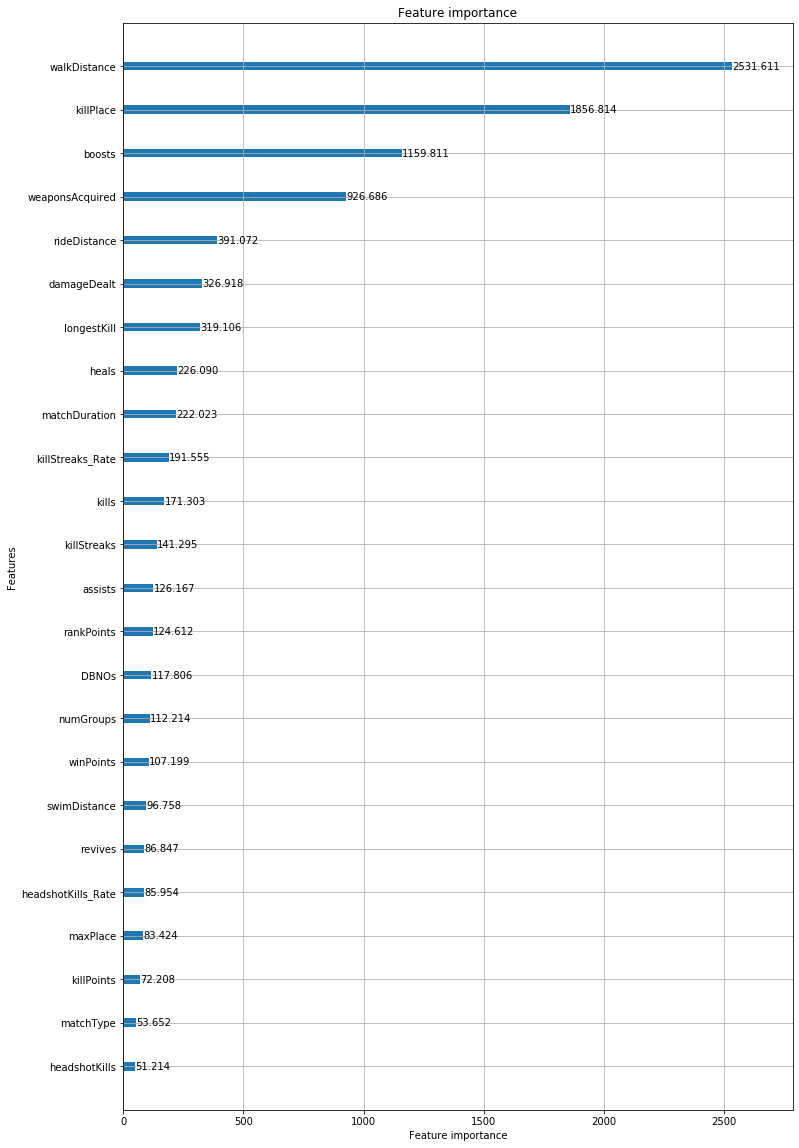

In [36]:
lgb.plot_importance(model_lgb, importance_type="gain", figsize=(12,20))

In [ ]:
importance = pd.DataFrame(model_lgb.feature_importance(importance_type="gain"),  index=model_lgb.feature_name(),columns=['importance'])

selected_feature = importance.sort_values("importance", ascending=False)[importance["importance"] >= 0.1].index

In [ ]:
selected_feature

In [ ]:
import pickle
with open('lgbm_importance.pickle', 'wb') as f:
    pickle.dump(selected_feature, f)

In [ ]:
selected_feature_for_linear = importance.sort_values("importance", ascending=False)[:50].index

In [ ]:
import pickle
with open('lgbm_importance_for_linear.pickle', 'wb') as f:
    pickle.dump(selected_feature_for_linear, f)

import pickle
with open('lgbm_importance.pickle', 'wb') as f:
    pickle.dump(selected_feature, f)

## MLP model by keras

In [ ]:
#X_train = X_train.replace(-99999, 0)
#X_train = X_train.replace(np.nan, 0)

In [36]:
#from sklearn.preprocessing import OneHotEncoder

obj_columns = ['matchType']

for c in obj_columns:
    dummies = pd.get_dummies(X_train_linear[c])
    X_train_linear = pd.concat([X_train_linear, dummies], axis=1)

In [37]:
selected_feature = selected_feature.append(dummies.columns)
selected_feature = selected_feature.drop("matchType")

In [38]:
selected_feature

Index([    'walkDistance_*_numGroups', 'matchDuration_-_walkDistance',
       'walkDistance_-_matchDuration',        'killPlace_*_killPlace',
            'longestKill_+_killPlace',   'damageDealt_+_walkDistance',
          'killPlace_*_matchDuration',  'rideDistance_+_walkDistance',
            'killPlace_/_longestKill',      'killPlace_+_damageDealt',
          'matchDuration_/_numGroups',     'walkDistance_/_killPlace',
       'matchDuration_/_walkDistance', 'walkDistance_/_matchDuration',
           'rideDistance_/_killPlace',                       'boosts',
         'damageDealt_-_walkDistance',                        'kills',
          'killPlace_/_matchDuration',        'killPlace_/_numGroups',
                    'weaponsAcquired',    'matchDuration_-_numGroups',
            'longestKill_-_numGroups',        'killPlace_+_numGroups',
           'killPlace_+_rideDistance',   'longestKill_/_walkDistance',
           'killPlace_/_walkDistance', 'rideDistance_-_matchDuration',
      

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard
from keras.initializers import he_normal
from keras import losses
from keras import optimizers


tensor_board = TensorBoard(log_dir='./baseline_MLP', histogram_freq=1)

In [ ]:
# random seed setting
import keras.backend as K
import tensorflow as tf

np.random.seed(seed=42)

# os.environ['PYTHONHASHSEED'] = '0'
# random.seed(0)

#session_conf = tf.ConfigProto(
  #  intra_op_parallelism_threads=1,
   # inter_op_parallelism_threads=1
#)

tf.set_random_seed(0)
#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)

In [ ]:
feature_len = X_train_linear[selected_feature].shape[1]

In [ ]:
import gc
del gc.garbage[:]
gc.collect()

In [ ]:
#define paramters
node=32
drop_out=0.01
batch_size=32
epochs = 10000
early_stopping_rounds = 10                       #もっとふやしてもいいと思う
loss_function = losses.mean_squared_error
metrics = ['mae']
lr = 1e-2
init = he_normal(seed=42)
verbose = 1

In [ ]:
# 一度学習したら初期化しないと引き継がれるので注意?
#define Network
model_NN = Sequential()
act = PReLU()
########### hidden layer(input layer include first layer)#########
model_NN.add(Dense(node, kernel_initializer=init, input_shape=(feature_len,)))
model_NN.add(act)
model_NN.add(BatchNormalization())
#model_NN.add(Dropout(drop_out))

model_NN.add(Dense(node, kernel_initializer=init))
model_NN.add(act)
model_NN.add(BatchNormalization())
#model_NN.add(Dropout(drop_out))

model_NN.add(Dense(node, kernel_initializer=init))
model_NN.add(act)
model_NN.add(BatchNormalization())
###########hidden layer#################################
model_NN.add(Dense(1,activation='linear', kernel_initializer=init))

In [ ]:
# define optimizer
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=early_stopping_rounds,
                               restore_best_weights=True,
                               verbose=verbose)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='auto',
                              facter=1e-2,
                              patience=2)

optimizer = optimizers.Adam(lr=lr)           

model_NN.compile(loss=loss_function,
             optimizer=optimizer,
             metrics=metrics)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list_NN = []
evaluation_results = {}

for tr_idx, val_idx in kf.split(X_train_linear[selected_feature], y_train):
    #make_datasets
    x_tr, x_val = X_train_linear[selected_feature].iloc[tr_idx], X_train_linear[selected_feature].iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    #normalization
    x_tr = sc.fit_transform(x_tr)
    x_val = sc.transform(x_val)
    #training
    history = model_NN.fit(x_tr, y_tr,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=verbose,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping, tensor_board]
                       )
    #predict&eval
    valid_pred = model_NN.predict(x_val)
    mae_list_NN.append(mean_absolute_error(valid_pred, y_val))
print('CV_MAE:{}'.format(np.mean(mae_list_NN)))
x_val_linear = x_val

In [ ]:
transformed_for_NN = sc.transform(X_test)

In [ ]:
?sc

In [ ]:
#CV_MAE:0.07090077673800255
#CV_MAE:0.07246490657533913
#CV_MAE:0.07007045680736629
#CV_MAE:0.05831930264462939
#CV_MAE:0.05804575379122393
#CV_MAE:0.052015935037883154

In [ ]:
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')

# XGBoost Model

In [ ]:
import xgboost as xgb

In [ ]:
params = {"objective": 'reg:squarederror',
                "eval_metric": 'mae', 
                "random_state":42,
                "silent": 1,
         }

evals_result = {}
callbacks=[xgb.callback.record_evaluation(evals_result)]

In [ ]:
?xgb.train

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list = []
evaluation_results = {}

for tr_idx, val_idx in kf.split(X_train, y_train):
    x_tr, x_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
    xgb_train = xgb.DMatrix(x_tr, label=y_tr)
    xgb_valid = xgb.DMatrix(x_val, label=y_val)
    
    watchlist = [(xgb_train, 'train'), (xgb_valid, 'eval')]
    model_xgb = xgb.train(params=params,
                          dtrain=xgb_train,
                          evals=watchlist,
                          num_boost_round=10000,
                          early_stopping_rounds=30,
                          callbacks=callbacks
                          )
    
    predict_proba = model_xgb.predict(xgb_valid, ntree_limit=model_xgb.best_iteration)
    mae_list.append(mean_absolute_error(predict_proba, y_val))

print('CV_MAE:{}'.format(np.mean(mae_list)))

In [ ]:
evals_result

In [ ]:
plt.plot(evals_result['train']['mae'], color="r")
plt.plot(evals_result['eval']['mae'], color="b")

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(model_xgb, ax=ax, importance_type='total_gain', show_values=True)

# Ensemble Models

In [67]:
from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fitted_models={}
mae_list_models = {}
evaluation_results = {}
predict_probas_ensembles = {}

for (model_name, model) in zip(model_names, models):
    for tr_idx, val_idx in kf.split(X_train, y_train):
        #make_datasets
        if (model_name == 'model_ridge' or model_name == 'model_k_nn'):
            x_tr, x_val = X_train_linear[selected_feature].iloc[tr_idx], X_train_linear[selected_feature].iloc[val_idx]
            y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        else:
            x_tr, x_val = X_train_tree[selected_feature].iloc[tr_idx], X_train_tree[selected_feature].iloc[val_idx]
            y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        if (model_name == 'model_ridge' or model_name == 'model_k_nn'):
            #normalization
            x_tr = sc.fit_transform(x_tr)
            x_val = sc.transform(x_val)
        #training
        model.fit(x_tr, y_tr)
        fitted_models[model_name] = model
        #predict&eval
        valid_pred = model.predict(x_val)
        mae_list_models[model_name] = mean_absolute_error(valid_pred, y_val)
        predict_probas_ensembles[model_name] = model.predict(x_val)
    print('#{0}#CV_MAE:{1}'.format(model_name,
                                   np.mean(mae_list_models[model_name])))
    #predict_probas[model_name] = fitted_models[model_names].predict(x_val)

In [ ]:
X_train[selected_feature]

In [53]:
model_ridge = Ridge(random_state=42, alpha=1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list_ridge = []
evaluation_results = {}

for tr_idx, val_idx in kf.split(X_train_linear[selected_feature], y_train):
    #make_datasets
    x_tr, x_val = X_train_linear[selected_feature].iloc[tr_idx], X_train_linear[selected_feature].iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    #normalization
    x_tr = sc.fit_transform(x_tr)
    x_val = sc.transform(x_val)
    #training
    model_ridge.fit(x_tr, y_tr)
    #predict&eval
    valid_pred = model_ridge.predict(x_val)
    mae_list_ridge.append(mean_absolute_error(valid_pred, y_val))
print('CV_MAE:{}'.format(np.mean(mae_list_ridge)))

CV_MAE:0.07768193226298423


In [ ]:
mae_list_ridge

In [54]:
model_k_nn = KNeighborsRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list_k_nn = []
evaluation_results = {}

for tr_idx, val_idx in kf.split(X_train_linear[selected_feature], y_train):
    #make_datasets
    x_tr, x_val = X_train_linear[selected_feature].iloc[tr_idx], X_train_linear[selected_feature].iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    #normalization
    x_tr = sc.fit_transform(x_tr)
    x_val = sc.transform(x_val)
    #training
    model_k_nn.fit(x_tr, y_tr)
    #predict&eval
    valid_pred = model_k_nn.predict(x_val)
    mae_list_k_nn.append(mean_absolute_error(valid_pred, y_val))
print('CV_MAE:{}'.format(np.mean(mae_list_k_nn)))

CV_MAE:0.07346798762855103


In [ ]:
mae_list_k_nn

In [ ]:
model_random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list_random_forest = []
evaluation_results = {}

for tr_idx, val_idx in kf.split(X_train_tree[selected_feature], y_train):
    #make_datasets
    x_tr, x_val = X_train_tree[selected_feature].iloc[tr_idx], X_train_tree[selected_feature].iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    #training
    model_random_forest.fit(x_tr, y_tr)
    #predict&eval
    valid_pred = model_random_forest.predict(x_val)
    mae_list_random_forest.append(mean_absolute_error(valid_pred, y_val))
print('CV_MAE:{}'.format(np.mean(mae_list_random_forest)))

In [ ]:
mae_list_random_forest

In [ ]:
model_NN_pre = model.predict(x_val_linear)
model_lgb_pre = model_lgb.predict(x_val_tree)

# RankAverage

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
model_lgb_pre = pd.Series(model_lgb_pre,)

In [ ]:
model_lgb_pre = pd.DataFrame(model_lgb_pre, columns=["TARGET"])
model_NN_pre = pd.DataFrame(model_NN_pre, columns=["TARGET"])
model_k_nn_pre = pd.DataFrame(, columns=["TARGET"])
model_ridge_pre = pd.DataFrame(, columns=["TARGET"])
model_random_forest_pre = pd.DataFrame(predict_probas_ensembles["model_random_forest"], columns=["TARGET"])

In [ ]:
# USING WEIGHTED AVERAGE RANK METHOD
# Plese refer this discussion for more detials - https://www.kaggle.com/c/home-credit-default-risk/discussion/60934

data = {}

data['model_lgb'] = model_lgb_pre
data['model_NN'] = model_NN_pre
data['model_k-nn'] = model_k_nn_pre
data['model_ridge'] = model_ridge_pre
data['model_random_forest'] = model_random_forest_pre

ranks = pd.DataFrame(columns=data.keys())
for key in data.keys():
    ranks[key] = data[key].TARGET.rank(method='min')
ranks['Average'] = ranks.mean(axis=1)
ranks['Scaled Rank'] = (ranks['Average'] - ranks['Average'].min()) / (ranks['Average'].max() - ranks['Average'].min())
ranks.corr()[:1]

weights = [1, 0, 0, 0, 0]
ranks['Score'] = ranks[["model_lgb", "model_NN", "model_k-nn", "model_ridge",
                        "model_random_forest"]].mul(weights).sum(1) / ranks.shape[0]
#submission_lb = pd.read_csv("../input/homecredt/submission.csv")
#submission_lb['TARGET'] = ranks['Score']
#submission_lb.to_csv("WEIGHT_AVERAGE_RANK.csv", index=None)
#submission_lb.head()

In [ ]:
print("mean_ensemble : {0}".format(mean_absolute_error(ranks["Score"], y_val)))

In [ ]:
model_lgb_pre

In [ ]:
ranks

In [ ]:
pre_mean = np.mean(np.c_[model_NN_pre, model_lgb_pre],axis=1)
print("mean_ensemble : {0}".format(mean_absolute_error(pre_mean, y_val)))

In [ ]:
mean_ensemble : 0.06666426849427326

In [ ]:
predict_probas_ensembles["model_ridge"]

In [ ]:
#predict_probas_ensembles["model_ridge"]

In [ ]:
for tr_idx, val_idx in kf.split(X_train, y_train):
    x_tr, x_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    sc_x_val = sc.transform(x_val)
    pre_ridge = fitted_models['model_ridge'].predict(sc_x_val)
    pre_RF = fitted_models['model_random_forest'].predict(x_val)
    pre_k_nn = fitted_models['model_k_nn'].predict(sc_x_val)
    pre_mean = np.c_[pre_ridge, pre_RF]
    pre_mean = np.mean(np.c_[pre_mean, pre_k_nn], axis=1)
    print(mean_absolute_error(pre_mean, y_val))

In [ ]:
pre_mean

In [ ]:
pd.DataFrame(np.hstack([pre_ridge, pre_RF, pre_k_nn]))

In [ ]:
pre_ridge

In [ ]:
fitted_models[model_name].predict

アンサンブル案

1.LightGBM(たくさんのfeatureをいれた)
2.LightGBM(特徴選択をした)
3.linear model(ridge or lasso)（特徴選択をした）
4.random forest（特徴選択をした）
5.XGBoost(特徴選択をした)
6.k-nn(特徴選択をした)